# **Blood Donation - Regression & Clustering**

## **WQD7003 Data Analytics - Group 2**

| Name              | Student Matric No |
|-------------------|-------------------|
| Lim Hon Ting      | S2114212          |
| Sam Wei Hong      | U2102776          |
| Lim Zheng Yu      | U2102809          |
| Chan See Mun      | 24085842          |
| Md Azrul Syaffiq  | 17127309          |


## **CRISP-DM Overview**

### Overview of CRISP-DM Methodology

**CRISP-DM** (Cross-Industry Standard Process for Data Mining) is a widely adopted framework that guides data science projects through a structured, iterative approach. It consists of six key phases:

1. **Business Understanding** – Define project objectives and requirements from a business perspective.
2. **Data Understanding** – Collect and explore data to identify quality issues, patterns, and initial insights.
3. **Data Preparation** – Clean, transform, and structure data for modeling.
4. **Modeling** – Apply statistical or machine learning models to the prepared data.
5. **Evaluation** – Assess the performance of models to ensure they meet business goals.
6. **Deployment** – Implement the results into real-world use, such as reports, dashboards, or APIs.

---

### Application to This Project

In this project, we apply the **CRISP-DM methodology** to forecast blood donation trends in Malaysia.


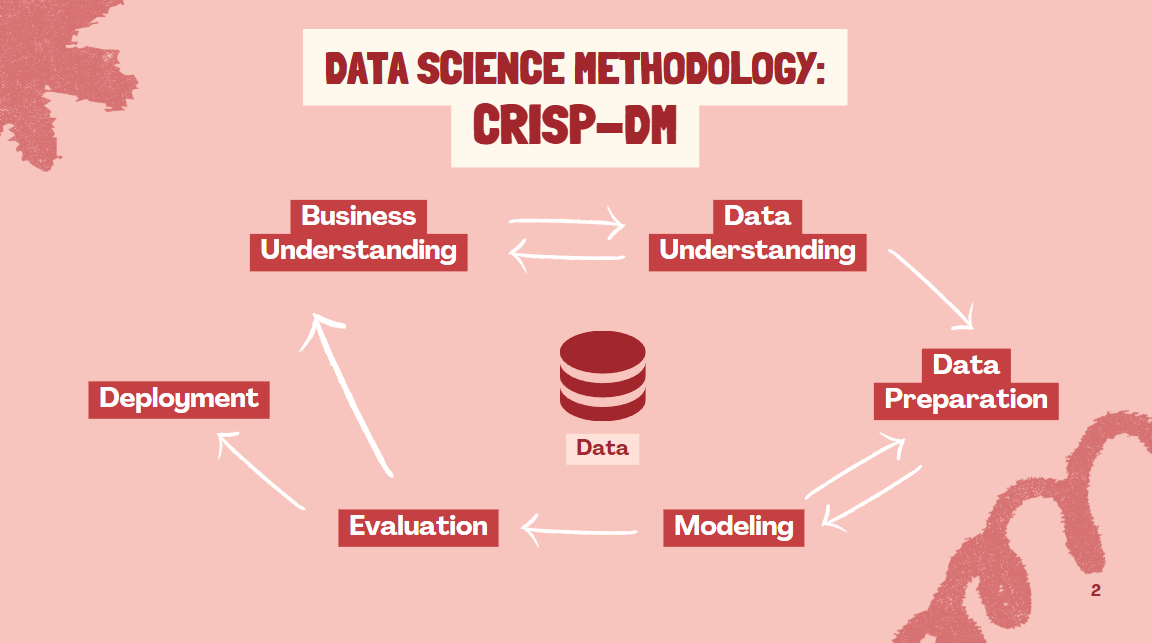

## **1. Business Understanding**

### **Problem Statement**

The goal of this project is to apply the **CRISP-DM methodology** to analyze **blood donation** data in Malaysia, identify **patterns**, and **forecast** future needs to ensure efficient resource distribution.

---

### **Project Objectives**

1. **Analyze** and understand current trends in blood donations  
2. **Predict** the number of blood donations for the next **3 months** and **2 years**
3. **Identify** hospitals with lower donation, so that targeted strategies can be developed to improve donor management
4. **Assess** the effectiveness of the forecasting models  
5. **Compare** the results of different modeling techniques and apply the findings to **real-world scenarios**


## **2. Data Understanding: Exploratory Data Analysis (EDA) for Blood Donation Datasets**
This notebook analyzes two datasets:
- `donations_facility_cleaned.csv`
- `donations_state_cleaned  .csv`

It covers data loading, cleaning, verification, descriptive statistics, time series analysis, and more.


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

### **2.1 Load Data**
Read the cleaned facility and state donation datasets.

In [ ]:
# Load the datasets
facility_df = pd.read_csv('data/cleaned/donations_facility_cleaned.csv')
state_df = pd.read_csv('data/cleaned/donations_state_cleaned.csv')

# Exclude rows where state is 'Malaysia' (case-insensitive) in state_df
# EXPLANATION: The 'Malaysia' row in donations_state.csv represents the national total (sum of all states).
# Including it would double-count the national total in any state-level analysis or comparison.
# We exclude it to ensure only individual state data is used for accurate analysis.
if 'state' in state_df.columns:
    state_df = state_df[~state_df['state'].str.lower().eq('malaysia')].copy()

### **2.2 Time Series Analysis: Yearly Donations**
Visualize the total yearly donations for both datasets.

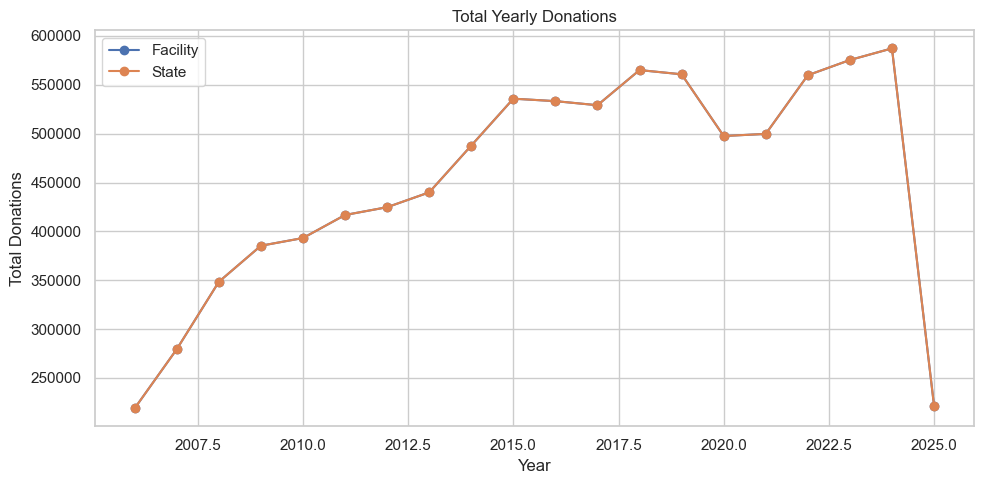

In [ ]:
# Make sure all previous cells have been run so that facility_df and state_df are defined

# Convert 'date' columns to datetime, handling different formats
facility_df['date'] = pd.to_datetime(facility_df['date'], errors='coerce')
state_df['date'] = pd.to_datetime(state_df['date'], dayfirst=True, errors='coerce')

# Group by year and sum donations
facility_yearly = facility_df.groupby(facility_df['date'].dt.year)['daily'].sum()
state_yearly = state_df.groupby(state_df['date'].dt.year)['daily'].sum()

plt.figure(figsize=(10,5))
facility_yearly.plot(label='Facility', marker='o')
state_yearly.plot(label='State', marker='o')
plt.title('Total Yearly Donations')
plt.xlabel('Year')
plt.ylabel('Total Donations')
plt.legend()
plt.tight_layout()
plt.show()

### **2.2.1 Yearly Donation Trends by Individual Facility**
Below, we show the yearly donation trends for each hospital/facility. This helps identify which facilities are growing, declining, or stable over time.

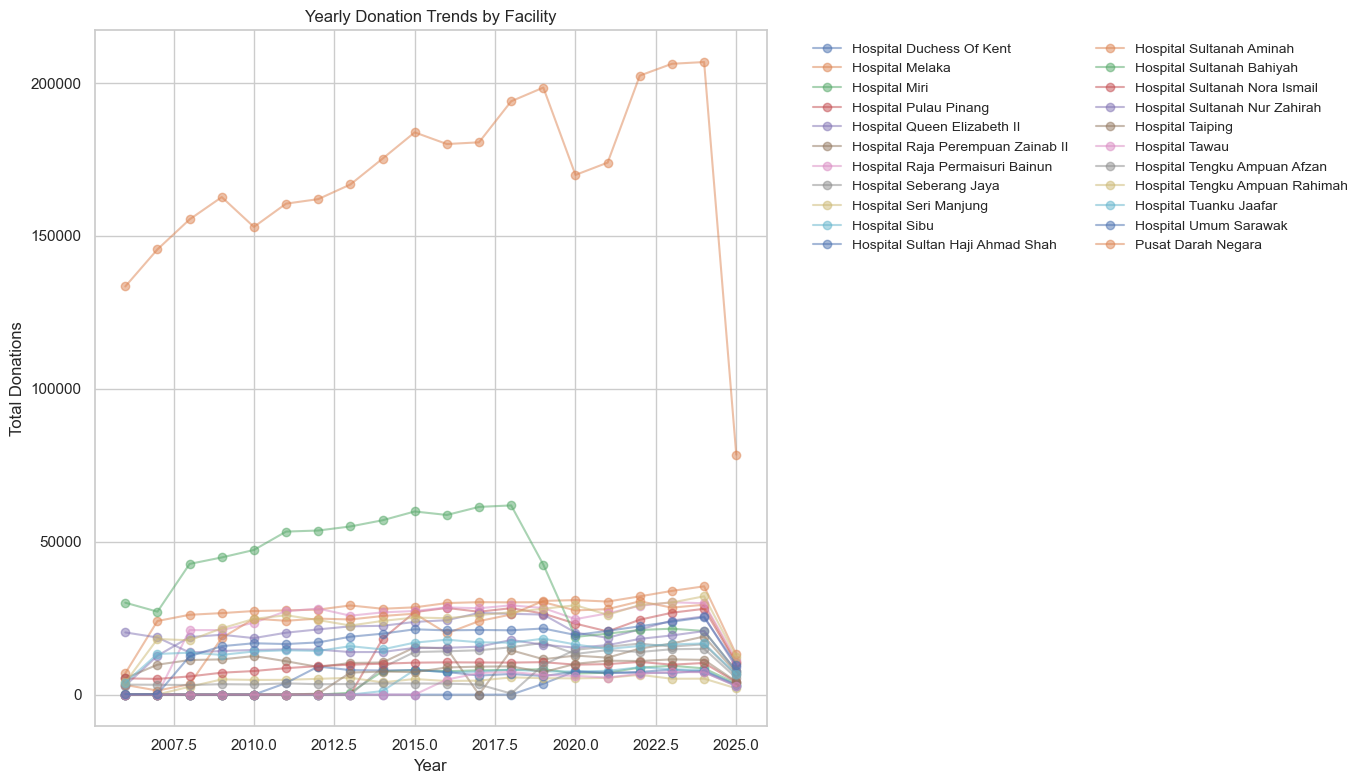

In [ ]:
facility_yearly_pivot.index = facility_yearly_pivot.index.astype(int)
plt.figure(figsize=(14,8))
for col in facility_yearly_pivot.columns:
    plt.plot(facility_yearly_pivot.index, facility_yearly_pivot[col], marker='o', label=col, alpha=0.5)
plt.title('Yearly Donation Trends by Facility')
plt.xlabel('Year')
plt.ylabel('Total Donations')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', ncol=2, frameon=False)
plt.tight_layout()
plt.show()


### **2.2.2 Yearly Donation Trends by Individual State**
Below, we show the yearly donation trends for each state. This helps identify which states are growing, declining, or stable over time.

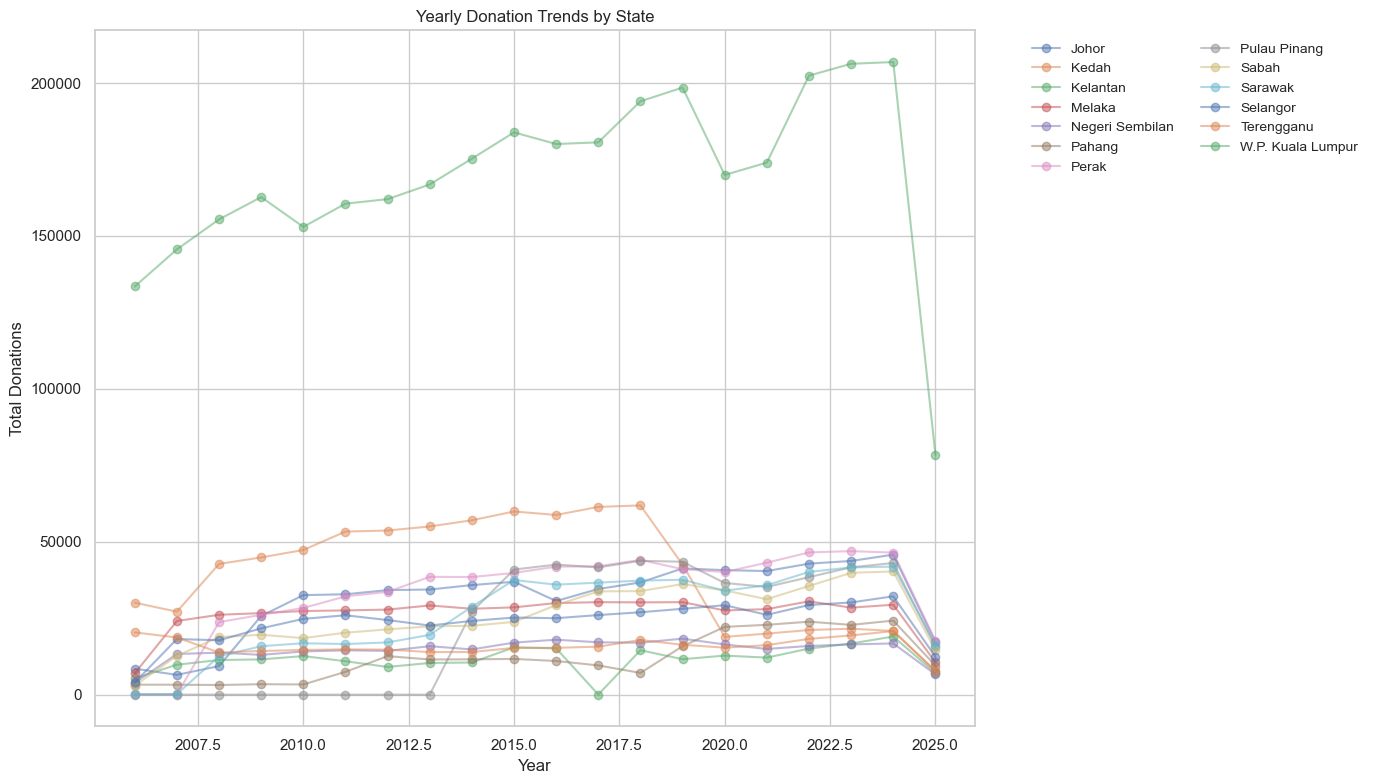

In [ ]:
# Pivot table: rows=year, columns=state, values=total donations
state_yearly_pivot = state_df.pivot_table(index=state_df['date'].dt.year, columns='state', values='daily', aggfunc='sum')
plt.figure(figsize=(14,8))
for col in state_yearly_pivot.columns:
    plt.plot(state_yearly_pivot.index, state_yearly_pivot[col], marker='o', label=col, alpha=0.5)
plt.title('Yearly Donation Trends by State')
plt.xlabel('Year')
plt.ylabel('Total Donations')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', ncol=2, frameon=False)
plt.tight_layout()
plt.show()

### **2.3 Time Series Analysis: Total Donations Over Time**
Visualize the total daily donations over time for both datasets.

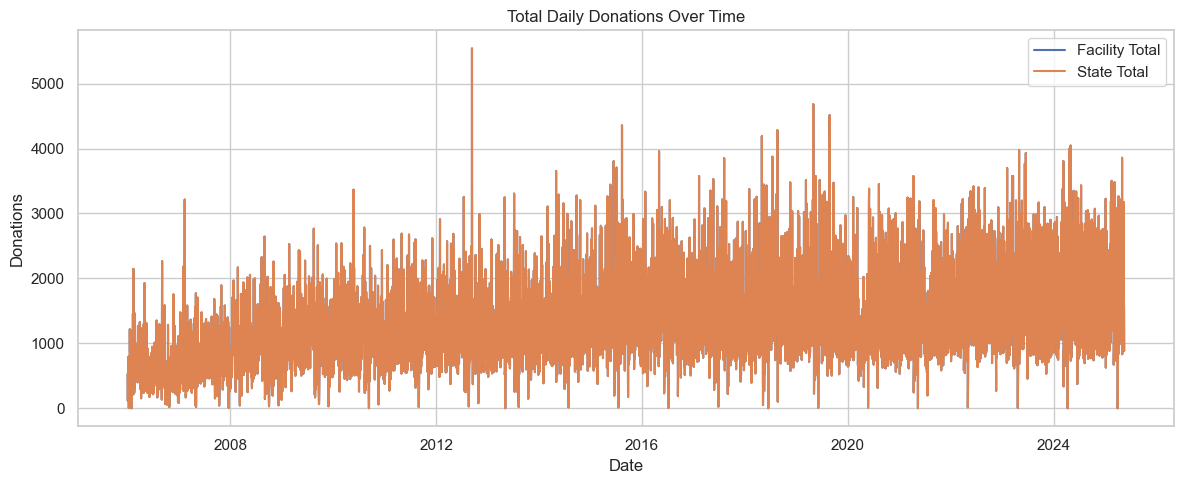

In [ ]:
plt.figure(figsize=(12,5))
facility_daily = facility_df.groupby('date')['daily'].sum()
state_daily = state_df.groupby('date')['daily'].sum()
plt.plot(facility_daily.index, facility_daily.values, label='Facility Total')
plt.plot(state_daily.index, state_daily.values, label='State Total')
plt.title('Total Daily Donations Over Time')
plt.xlabel('Date')
plt.ylabel('Donations')
plt.legend()
plt.tight_layout()
plt.show()

### **2.4 Analysis by Hospital/Facility**
Hospitals by total donations.

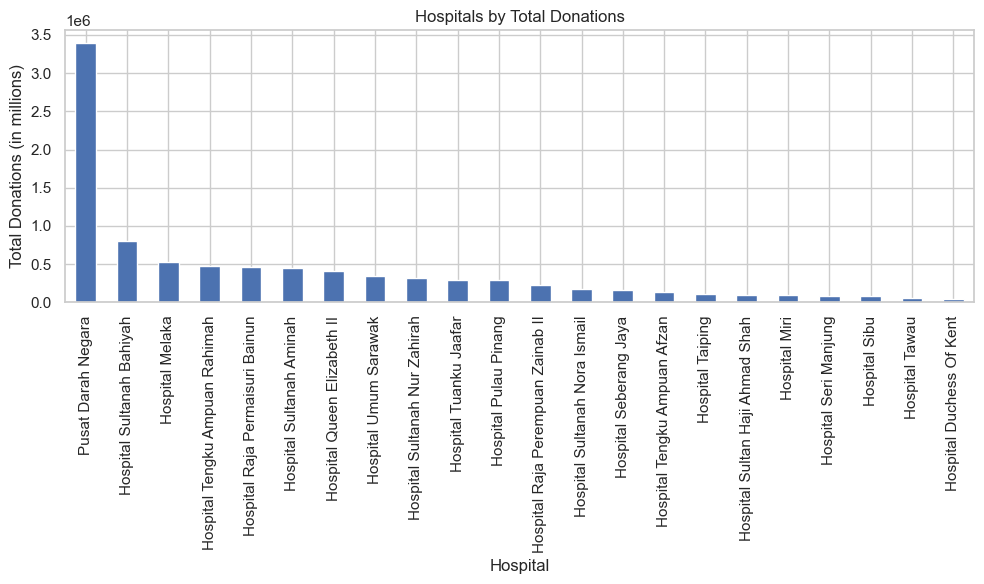

In [ ]:
facility_totals = facility_df.groupby('hospital')['daily'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
facility_totals.head(23).plot(kind='bar')
plt.title('Hospitals by Total Donations')
plt.ylabel('Total Donations (in millions)')
plt.xlabel('Hospital')
plt.tight_layout()
plt.show()

### **2.5 Analysis by State**
Total donations by state (if available).

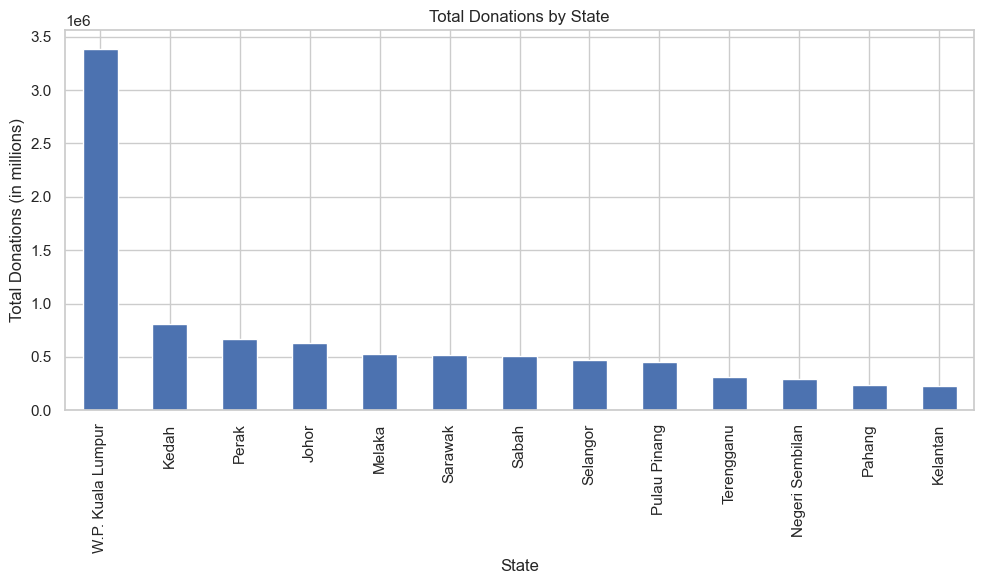

In [ ]:
if 'state' in state_df.columns:
    state_totals = state_df.groupby('state')['daily'].sum().sort_values(ascending=False)
    plt.figure(figsize=(10,6))
    state_totals.plot(kind='bar')
    plt.title('Total Donations by State')
    plt.ylabel('Total Donations (in millions)')
    plt.xlabel('State')
    plt.tight_layout()
    plt.show()

### **2.6 Blood Type Distribution**
Compare the distribution of blood types between the two datasets.

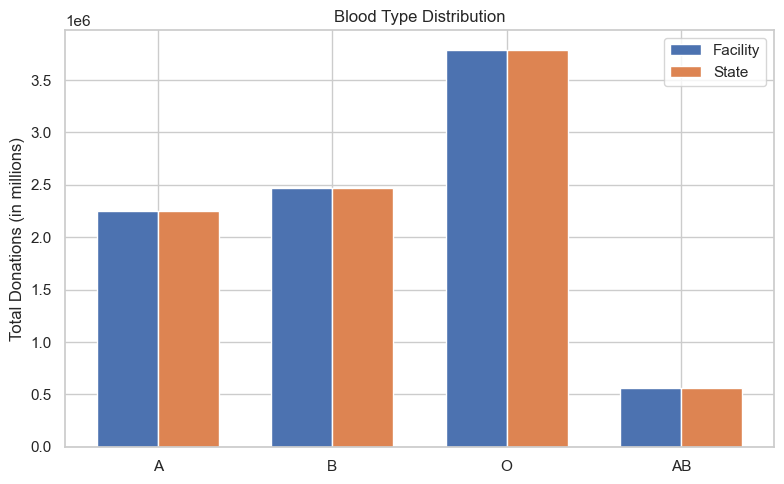

In [ ]:
blood_types = ['blood_a', 'blood_b', 'blood_o', 'blood_ab']
plt.figure(figsize=(8,5))
facility_blood = facility_df[blood_types].sum()
state_blood = state_df[blood_types].sum()
width = 0.35
x = np.arange(len(blood_types))
plt.bar(x - width/2, facility_blood, width, label='Facility')
plt.bar(x + width/2, state_blood, width, label='State')
plt.xticks(x, ['A', 'B', 'O', 'AB'])
plt.ylabel('Total Donations (in millions)')
plt.title('Blood Type Distribution')
plt.legend()
plt.tight_layout()
plt.show()

### **2.7 Donation Type Analysis**
Distribution of donation types (whole blood, apheresis platelet, apheresis plasma, other).

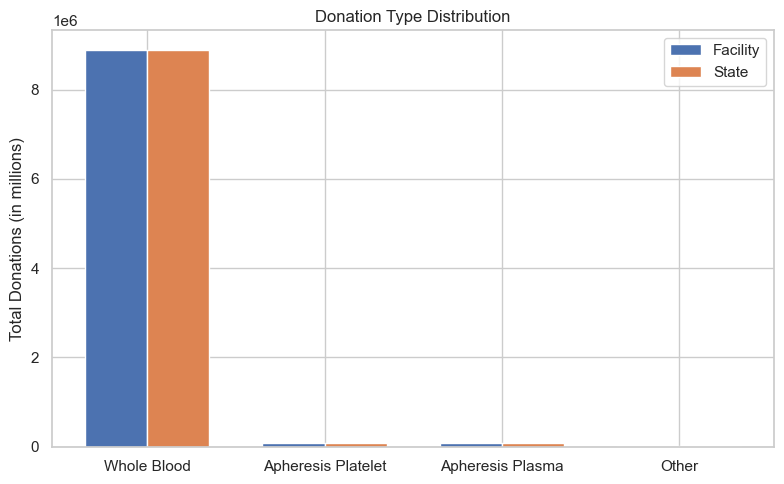

In [ ]:
donation_types = ['type_wholeblood', 'type_apheresis_platelet', 'type_apheresis_plasma', 'type_other']
plt.figure(figsize=(8,5))
facility_types = facility_df[donation_types].sum()
state_types = state_df[donation_types].sum()
plt.bar(x - width/2, facility_types, width, label='Facility')
plt.bar(x + width/2, state_types, width, label='State')
plt.xticks(x, ['Whole Blood', 'Apheresis Platelet', 'Apheresis Plasma', 'Other'])
plt.ylabel('Total Donations (in millions)')
plt.title('Donation Type Distribution')
plt.legend()
plt.tight_layout()
plt.show()

### **2.8 Social Group Analysis**
Distribution of donations by social group (civilian, student, police/army).

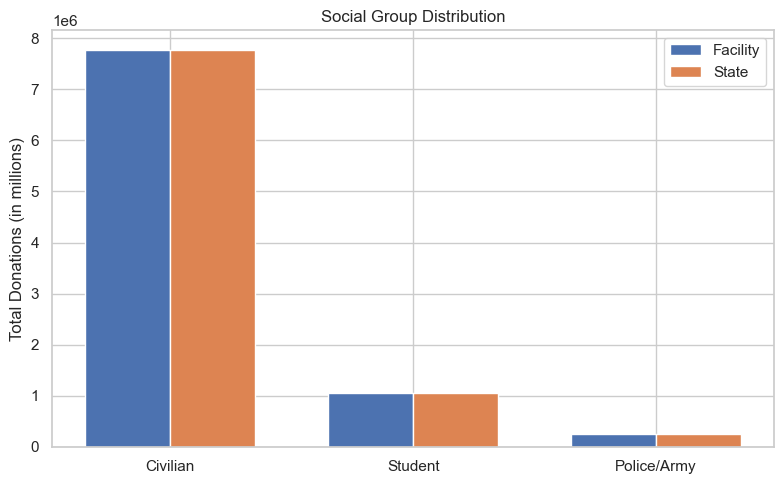

In [ ]:
social_groups = ['social_civilian', 'social_student', 'social_policearmy']
plt.figure(figsize=(8,5))
facility_social = facility_df[social_groups].sum()
state_social = state_df[social_groups].sum()
x_social = np.arange(len(social_groups))
plt.bar(x_social - width/2, facility_social, width, label='Facility')
plt.bar(x_social + width/2, state_social, width, label='State')
plt.xticks(x_social, ['Civilian', 'Student', 'Police/Army'])
plt.ylabel('Total Donations (in millions)')
plt.title('Social Group Distribution')
plt.legend()
plt.tight_layout()
plt.show()

### **2.9 Donor Type Analysis**
Distribution of new, regular, and irregular donors.

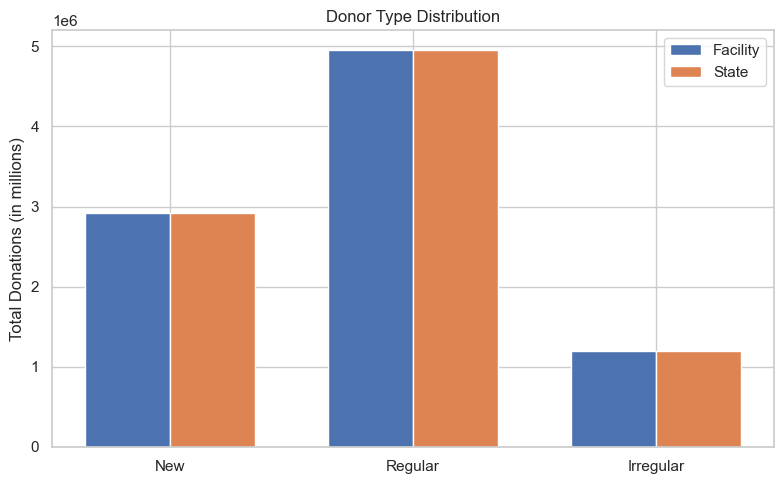

In [ ]:
donor_types = ['donations_new', 'donations_regular', 'donations_irregular']
plt.figure(figsize=(8,5))
facility_donors = facility_df[donor_types].sum()
state_donors = state_df[donor_types].sum()
x_donor = np.arange(len(donor_types))
plt.bar(x_donor - width/2, facility_donors, width, label='Facility')
plt.bar(x_donor + width/2, state_donors, width, label='State')
plt.xticks(x_donor, ['New', 'Regular', 'Irregular'])
plt.ylabel('Total Donations (in millions)')
plt.title('Donor Type Distribution')
plt.legend()
plt.tight_layout()
plt.show()

### **2.10 Correlation Analysis**
Correlation heatmaps for numeric columns in both datasets.

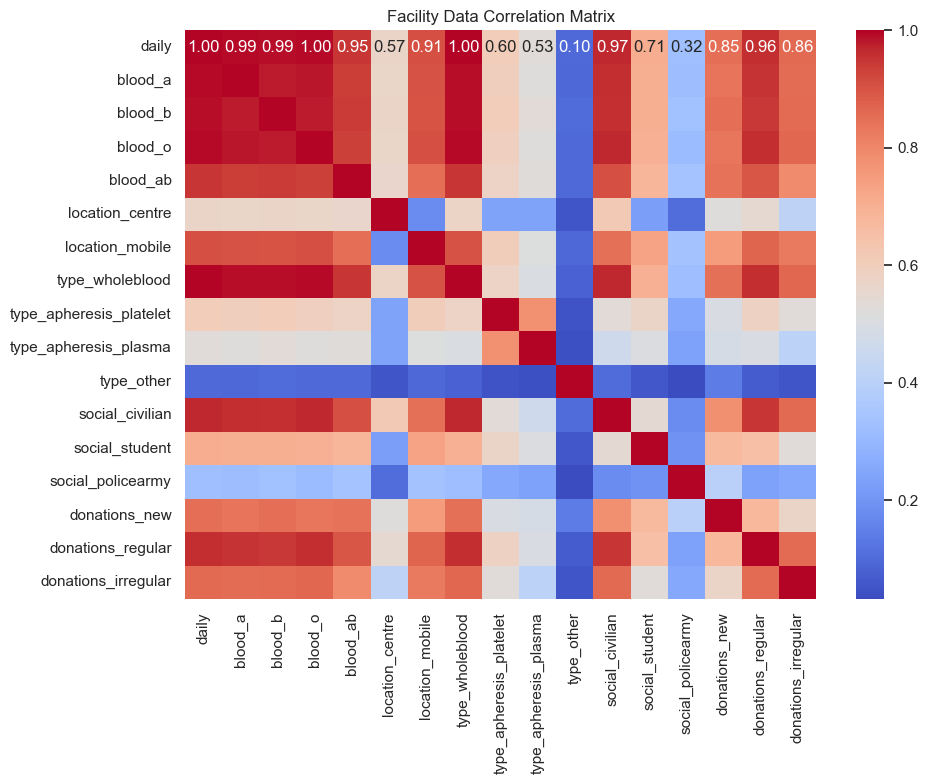

/opt/anaconda3/lib/python3.12/site-packages/seaborn/matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



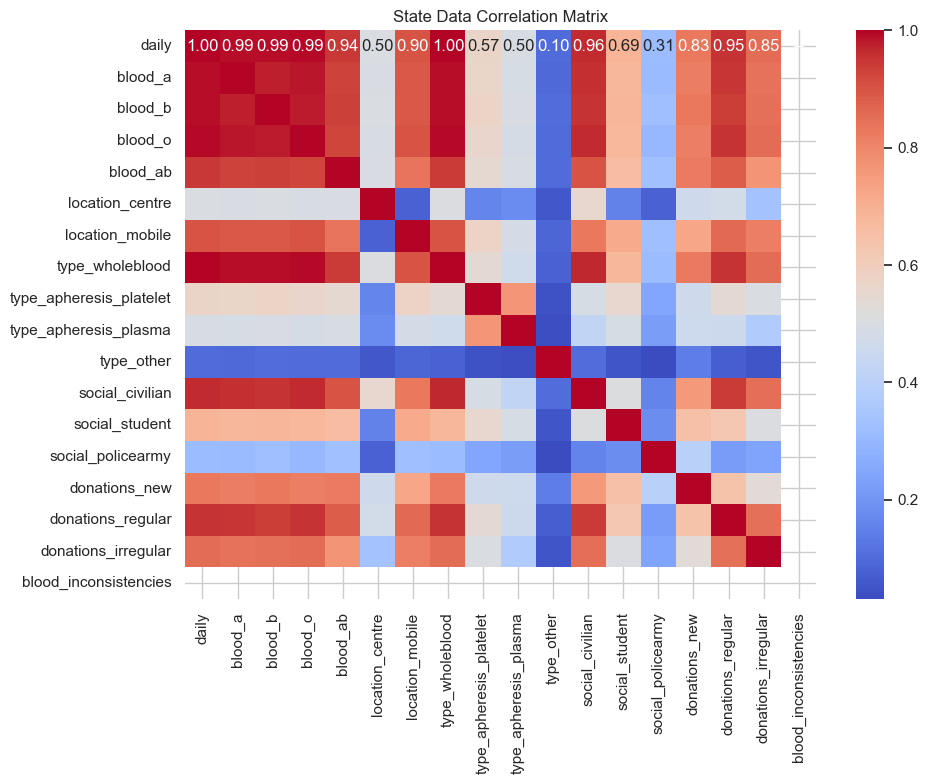

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(facility_df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Facility Data Correlation Matrix')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(state_df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('State Data Correlation Matrix')
plt.tight_layout()
plt.show()

### **2.11 Seasonality/Monthly Trends**
Monthly trend of total donations for both datasets.

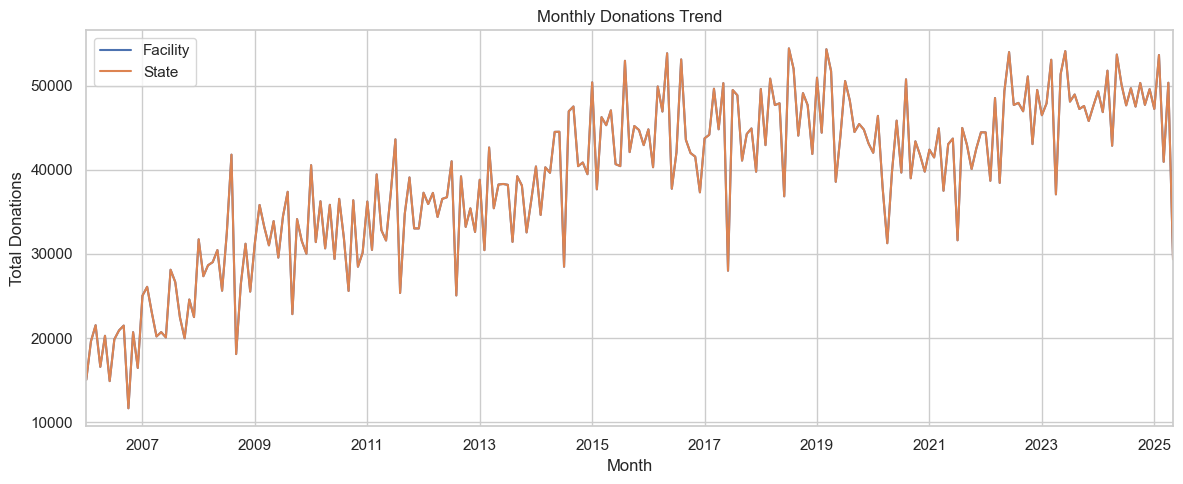

In [ ]:
facility_monthly = facility_df.groupby(facility_df['date'].dt.to_period('M'))['daily'].sum()
state_monthly = state_df.groupby(state_df['date'].dt.to_period('M'))['daily'].sum()
plt.figure(figsize=(12,5))
facility_monthly.plot(label='Facility')
state_monthly.plot(label='State')
plt.title('Monthly Donations Trend')
plt.xlabel('Month')
plt.ylabel('Total Donations')
plt.legend()
plt.tight_layout()
plt.show()

### **2.12 List of Hospitals in Each Quadrant and Recommendations**
Below are all hospitals grouped by their quadrant. Use this to identify which facilities need support and which can help others.

In [ ]:
# Display all hospitals in each quadrant as tables
for q in choices:
    hospitals_in_q = hospital_stats[hospital_stats['quadrant'] == q].copy()
    display_df = hospitals_in_q[['mean', 'std', 'count']].sort_values(by='mean', ascending=False)
    display_df = display_df.reset_index().rename(columns={'hospital': 'Hospital', 'mean': 'Mean Daily', 'std': 'Std Dev', 'count': 'Days'})
    print(f"\n--- Hospitals in {q} --- (Total: {len(display_df)} hospitals)")
    display(display_df)


--- Hospitals in Q1: High Mean, High Std --- (Total: 10 hospitals)


,Hospital,Mean Daily,Std Dev,Days
0,Pusat Darah Negara,479.048756,256.800907,7076
1,Hospital Sultanah Bahiyah,113.836207,91.061439,7076
2,Hospital Melaka,74.516393,65.677879,7076
3,Hospital Tengku Ampuan Rahimah,66.975269,61.778085,7076
4,Hospital Raja Permaisuri Bainun,66.024873,64.546643,7076
5,Hospital Sultanah Aminah,64.142736,61.150198,7076
6,Hospital Queen Elizabeth II,57.265546,68.362544,7076
7,Hospital Umum Sarawak,48.851046,47.484703,7076
8,Hospital Sultanah Nur Zahirah,44.819955,46.873565,7076
9,Hospital Pulau Pinang,40.823488,52.978460,7076



--- Hospitals in Q2: High Mean, Low Std --- (Total: 1 hospitals)


,Hospital,Mean Daily,Std Dev,Days
0,Hospital Tuanku Jaafar,41.239259,40.536295,7076



--- Hospitals in Q3: Low Mean, High Std --- (Total: 1 hospitals)


,Hospital,Mean Daily,Std Dev,Days
0,Hospital Raja Perempuan Zainab II,32.615602,41.187981,7076



--- Hospitals in Q4: Low Mean, Low Std --- (Total: 10 hospitals)


,Hospital,Mean Daily,Std Dev,Days
0,Hospital Sultanah Nora Ismail,24.934002,39.259535,7076
1,Hospital Seberang Jaya,22.750000,36.683960,7076
2,Hospital Tengku Ampuan Afzan,19.311334,29.359425,7076
3,Hospital Taiping,16.451244,24.837223,7076
4,Hospital Sultan Haji Ahmad Shah,14.596241,24.186290,7076
5,Hospital Miri,13.124505,22.931027,7076
6,Hospital Seri Manjung,12.273177,22.025539,7076
7,Hospital Sibu,11.781656,22.511339,7076
8,Hospital Tawau,8.746750,18.951305,7076
9,Hospital Duchess Of Kent,6.233183,17.697774,7076


#### What to do for each quadrant:
- **Q1 (High Mean, High Std):** Monitor for supply swings; may help others but need stabilization. Consider sharing best practices and resources to reduce variability.
- **Q2 (High Mean, Low Std):** Ideal for supporting low-donation facilities. These are your most reliable donors for redistribution.
- **Q3 (Low Mean, High Std):** Need support and stabilization. Investigate causes of instability and provide targeted interventions.
- **Q4 (Low Mean, Low Std):** May need support, but predictable. Consider gradual support or partnership with Q2 facilities.


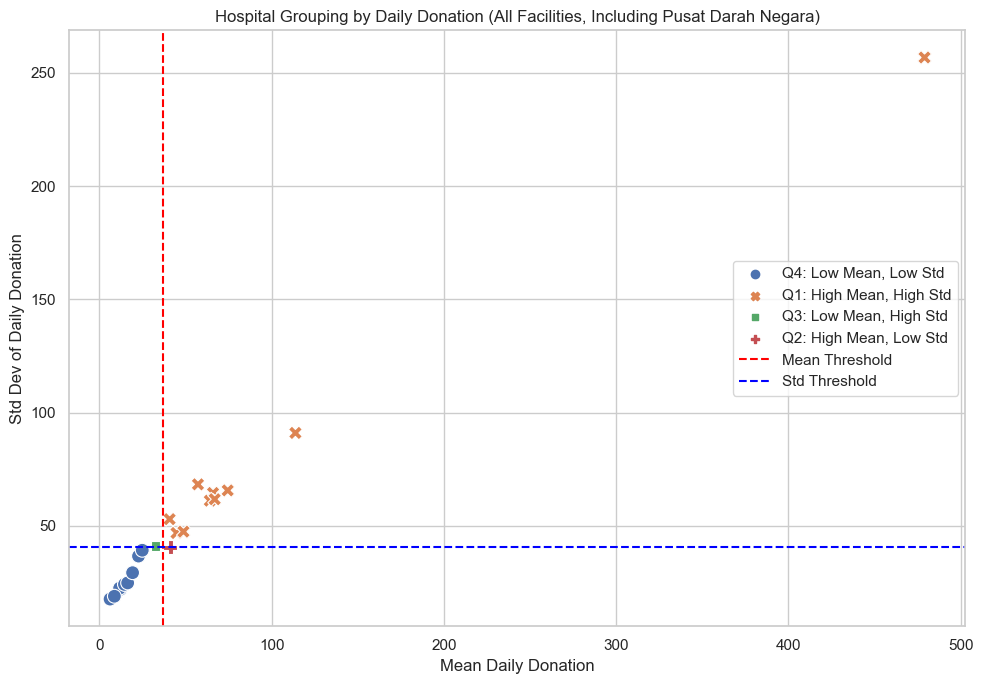


--- Hospitals in Q1: High Mean, High Std (All Facilities) --- (Total: 10 hospitals)


,Hospital,Mean Daily,Std Dev,Days
0,Pusat Darah Negara,479.048756,256.800907,7076
1,Hospital Sultanah Bahiyah,113.836207,91.061439,7076
2,Hospital Melaka,74.516393,65.677879,7076
3,Hospital Tengku Ampuan Rahimah,66.975269,61.778085,7076
4,Hospital Raja Permaisuri Bainun,66.024873,64.546643,7076
5,Hospital Sultanah Aminah,64.142736,61.150198,7076
6,Hospital Queen Elizabeth II,57.265546,68.362544,7076
7,Hospital Umum Sarawak,48.851046,47.484703,7076
8,Hospital Sultanah Nur Zahirah,44.819955,46.873565,7076
9,Hospital Pulau Pinang,40.823488,52.978460,7076



--- Hospitals in Q2: High Mean, Low Std (All Facilities) --- (Total: 1 hospitals)


,Hospital,Mean Daily,Std Dev,Days
0,Hospital Tuanku Jaafar,41.239259,40.536295,7076



--- Hospitals in Q3: Low Mean, High Std (All Facilities) --- (Total: 1 hospitals)


,Hospital,Mean Daily,Std Dev,Days
0,Hospital Raja Perempuan Zainab II,32.615602,41.187981,7076



--- Hospitals in Q4: Low Mean, Low Std (All Facilities) --- (Total: 10 hospitals)


,Hospital,Mean Daily,Std Dev,Days
0,Hospital Sultanah Nora Ismail,24.934002,39.259535,7076
1,Hospital Seberang Jaya,22.750000,36.683960,7076
2,Hospital Tengku Ampuan Afzan,19.311334,29.359425,7076
3,Hospital Taiping,16.451244,24.837223,7076
4,Hospital Sultan Haji Ahmad Shah,14.596241,24.186290,7076
5,Hospital Miri,13.124505,22.931027,7076
6,Hospital Seri Manjung,12.273177,22.025539,7076
7,Hospital Sibu,11.781656,22.511339,7076
8,Hospital Tawau,8.746750,18.951305,7076
9,Hospital Duchess Of Kent,6.233183,17.697774,7076



Check for 'Pusat Darah Negara' in all facilities:


,mean,std,count,quadrant
hospital,,,,
Pusat Darah Negara,479.048756,256.800907,7076,"Q1: High Mean, High Std"


In [ ]:
# Lower the minimum record threshold to include all facilities, even those with few records
hospital_stats_all = facility_df.groupby('hospital')['daily'].agg(['mean', 'std', 'count'])

# Calculate thresholds (median split) for all facilities
mean_thresh_all = hospital_stats_all['mean'].median()
std_thresh_all = hospital_stats_all['std'].median()

# Assign quadrants for all facilities
conditions_all = [
    (hospital_stats_all['mean'] >= mean_thresh_all) & (hospital_stats_all['std'] >= std_thresh_all),  # Q1
    (hospital_stats_all['mean'] >= mean_thresh_all) & (hospital_stats_all['std'] < std_thresh_all),   # Q2
    (hospital_stats_all['mean'] < mean_thresh_all) & (hospital_stats_all['std'] >= std_thresh_all),   # Q3
    (hospital_stats_all['mean'] < mean_thresh_all) & (hospital_stats_all['std'] < std_thresh_all)     # Q4
]
choices = ['Q1: High Mean, High Std', 'Q2: High Mean, Low Std', 'Q3: Low Mean, High Std', 'Q4: Low Mean, Low Std']
hospital_stats_all['quadrant'] = np.select(conditions_all, choices)

# Plot for all facilities
plt.figure(figsize=(10,7))
sns.scatterplot(data=hospital_stats_all, x='mean', y='std', hue='quadrant', style='quadrant', s=100)
plt.axvline(mean_thresh_all, color='red', linestyle='--', label='Mean Threshold')
plt.axhline(std_thresh_all, color='blue', linestyle='--', label='Std Threshold')
plt.title('Hospital Grouping by Daily Donation (All Facilities, Including Pusat Darah Negara)')
plt.xlabel('Mean Daily Donation')
plt.ylabel('Std Dev of Daily Donation')
plt.legend()
plt.tight_layout()
plt.show()

# Display all hospitals in each quadrant (all facilities) as tables
for q in choices:
    hospitals_in_q = hospital_stats_all[hospital_stats_all['quadrant'] == q].copy()
    display_df = hospitals_in_q[['mean', 'std', 'count']].sort_values(by='mean', ascending=False)
    display_df = display_df.reset_index().rename(columns={'hospital': 'Hospital', 'mean': 'Mean Daily', 'std': 'Std Dev', 'count': 'Days'})
    print(f"\n--- Hospitals in {q} (All Facilities) --- (Total: {len(display_df)} hospitals)")
    display(display_df)

# Check if 'Pusat Darah Negara' is present
print("\nCheck for 'Pusat Darah Negara' in all facilities:")
display(hospital_stats_all.loc[hospital_stats_all.index.str.contains('pusat darah negara', case=False)])

### **2.13 State Grouping by Daily Donation: Quadrant Analysis**
We now perform the same quadrant analysis for states, grouping them by their average and variability of daily donations.

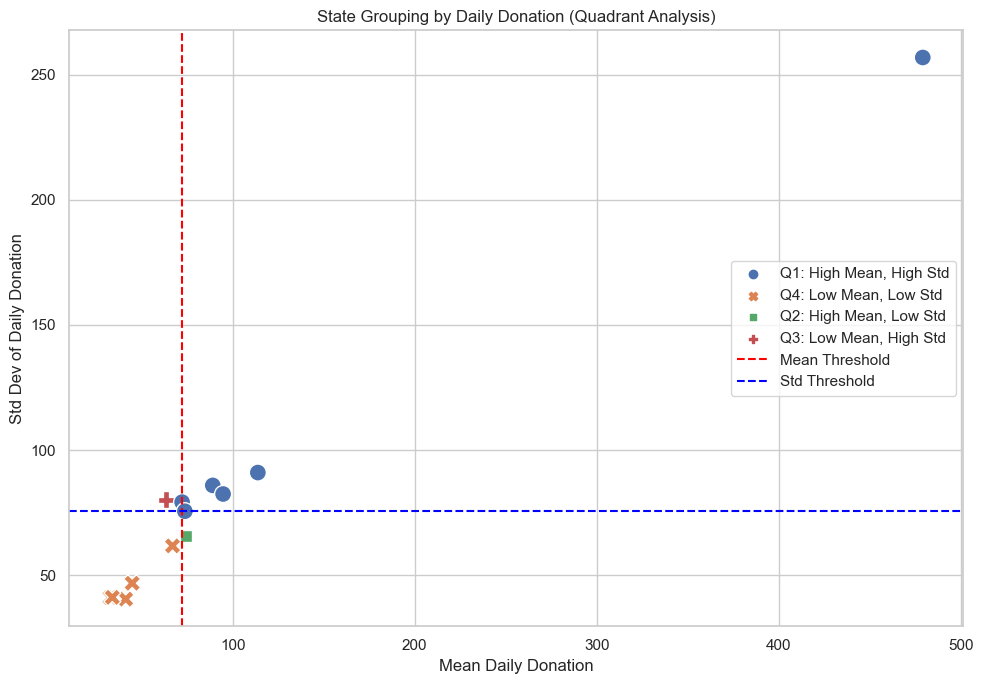


--- States in Q1: High Mean, High Std --- (Total: 6 states)


,State,Mean Daily,Std Dev,Days,Quadrant
0,W.P. Kuala Lumpur,479.048756,256.800907,7076,"Q1: High Mean, High Std"
1,Kedah,113.836207,91.061439,7076,"Q1: High Mean, High Std"
2,Perak,94.749293,82.499677,7076,"Q1: High Mean, High Std"
3,Johor,89.076738,85.933490,7076,"Q1: High Mean, High Std"
4,Sarawak,73.757207,75.623274,7076,"Q1: High Mean, High Std"
5,Sabah,72.245478,79.254706,7076,"Q1: High Mean, High Std"



--- States in Q2: High Mean, Low Std --- (Total: 1 states)


,State,Mean Daily,Std Dev,Days,Quadrant
0,Melaka,74.516393,65.677879,7076,"Q2: High Mean, Low Std"



--- States in Q3: Low Mean, High Std --- (Total: 1 states)


,State,Mean Daily,Std Dev,Days,Quadrant
0,Pulau Pinang,63.573488,80.137086,7076,"Q3: Low Mean, High Std"



--- States in Q4: Low Mean, Low Std --- (Total: 5 states)


,State,Mean Daily,Std Dev,Days,Quadrant
0,Selangor,66.975269,61.778085,7076,"Q4: Low Mean, Low Std"
1,Terengganu,44.819955,46.873565,7076,"Q4: Low Mean, Low Std"
2,Negeri Sembilan,41.239259,40.536295,7076,"Q4: Low Mean, Low Std"
3,Pahang,33.907575,41.233544,7076,"Q4: Low Mean, Low Std"
4,Kelantan,32.615602,41.187981,7076,"Q4: Low Mean, Low Std"


In [ ]:
# State-level quadrant analysis
state_stats = state_df.groupby('state')['daily'].agg(['mean', 'std', 'count'])

# Include all states regardless of record count
mean_thresh_state = state_stats['mean'].median()
std_thresh_state = state_stats['std'].median()

conditions_state = [
    (state_stats['mean'] >= mean_thresh_state) & (state_stats['std'] >= std_thresh_state),  # Q1
    (state_stats['mean'] >= mean_thresh_state) & (state_stats['std'] < std_thresh_state),   # Q2
    (state_stats['mean'] < mean_thresh_state) & (state_stats['std'] >= std_thresh_state),   # Q3
    (state_stats['mean'] < mean_thresh_state) & (state_stats['std'] < std_thresh_state)     # Q4
]
choices_state = ['Q1: High Mean, High Std', 'Q2: High Mean, Low Std', 'Q3: Low Mean, High Std', 'Q4: Low Mean, Low Std']
state_stats['quadrant'] = np.select(conditions_state, choices_state)

# Plot for states
plt.figure(figsize=(10,7))
sns.scatterplot(data=state_stats, x='mean', y='std', hue='quadrant', style='quadrant', s=150)
plt.axvline(mean_thresh_state, color='red', linestyle='--', label='Mean Threshold')
plt.axhline(std_thresh_state, color='blue', linestyle='--', label='Std Threshold')
plt.title('State Grouping by Daily Donation (Quadrant Analysis)')
plt.xlabel('Mean Daily Donation')
plt.ylabel('Std Dev of Daily Donation')
plt.legend()
plt.tight_layout()
plt.show()

# Display all states in each quadrant as tables
for q in choices_state:
    states_in_q = state_stats[state_stats['quadrant'] == q].copy()
    display_df = states_in_q[['mean', 'std', 'count', 'quadrant']].sort_values(by='mean', ascending=False)
    display_df = display_df.reset_index().rename(columns={'state': 'State', 'mean': 'Mean Daily', 'std': 'Std Dev', 'count': 'Days', 'quadrant': 'Quadrant'})
    print(f"\n--- States in {q} --- (Total: {len(display_df)} states)")
    display(display_df)

**Interpretation for States:**
- Q1: Large, unstable states. Monitor and stabilize.
- Q2: Large, stable states. Can support others.
- Q3: Small, unstable states. Need support and stabilization.
- Q4: Small, stable states. Predictable, may need gradual support.

Use this to identify which states need the most blood donation and which can help others.

## **3. Data Pre-processing**

### **3.1 Load Files and Understand Data Files**

In [ ]:
import pandas as pd

donations_facility = pd.read_csv("data/original/donations_facility.csv")
donations_state = pd.read_csv("data/original/donations_state.csv")
newdonors_facility = pd.read_csv("data/original/newdonors_facility.csv")
newdonors_state = pd.read_csv("data/original/newdonors_state.csv")

print(f"donations_facility.shape    : {donations_facility.shape}")
print(f"donations_state.shape       : {donations_state.shape}")
print(f"newdonors_facility.shape    : {newdonors_facility.shape}")
print(f"newdonors_state.shape       : {newdonors_state.shape}")

print()
print(f"donations_facility.columns:\n{list(donations_facility.columns)}\n")
print(f"donations_state.columns:\n{list(donations_state.columns)}\n")
print(f"newdonors_facility.columns:\n{list(newdonors_facility.columns)}\n")
print(f"newdonors_state.columns:\n{list(newdonors_state.columns)}\n")

print()
print(f"donations_facility.isna().sum():\n{donations_facility.isna().sum()}\n")
print(f"donations_state.isna().sum():\n{donations_state.isna().sum()}\n")
print(f"newdonors_facility.isna().sum():\n{newdonors_facility.isna().sum()}\n")
print(f"newdonors_state.isna().sum():\n{newdonors_state.isna().sum()}\n")

donations_facility.shape    : (198128, 19)
donations_state.shape       : (99064, 19)
newdonors_facility.shape    : (191052, 13)
newdonors_state.shape       : (99064, 13)

donations_facility.columns:
['date', 'hospital', 'daily', 'blood_a', 'blood_b', 'blood_o', 'blood_ab', 'location_centre', 'location_mobile', 'type_wholeblood', 'type_apheresis_platelet', 'type_apheresis_plasma', 'type_other', 'social_civilian', 'social_student', 'social_policearmy', 'donations_new', 'donations_regular', 'donations_irregular']

donations_state.columns:
['date', 'state', 'daily', 'blood_a', 'blood_b', 'blood_o', 'blood_ab', 'location_centre', 'location_mobile', 'type_wholeblood', 'type_apheresis_platelet', 'type_apheresis_plasma', 'type_other', 'social_civilian', 'social_student', 'social_policearmy', 'donations_new', 'donations_regular', 'donations_irregular']

newdonors_facility.columns:
['date', 'hospital', '17-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', 'other', 'tot

### **3.2 Handling Missing Values**

#### **3.2.1 donations_facility**

In [ ]:
donations_facility["hospital"].value_counts()

hospital
Hospital Sultanah Nora Ismail        7076
Hospital Sultanah Aminah             7076
Hospital Sibu                        7076
Hospital Miri                        7076
Hospital Umum Sarawak                7076
Hospital Tawau                       7076
Hospital Duchess Of Kent             7076
Hospital Queen Elizabeth II          7076
Hospital Sultanah Nur Zahirah        7076
Hospital Tengku Ampuan Rahimah       7076
Hospital Seri Manjung                7076
Hospital Taiping                     7076
Hospital Raja Permaisuri Bainun      7076
Hospital Pulau Pinang                7076
Hospital Seberang Jaya               7076
Hospital Sultan Haji Ahmad Shah      7076
Hospital Tengku Ampuan Afzan         7076
Hospital Tuanku Jaafar               7076
Hospital Melaka                      7076
Hospital Raja Perempuan Zainab II    7076
Hospital Sultanah Bahiyah            7076
Pusat Darah Negara                   7076
Name: count, dtype: int64

In [ ]:
len(donations_facility["hospital"].value_counts())

22

Based on the cells above, we can see that there are 22 recorded hospitals, each with 7076 records (22*7076 = 155672 records). The number of missing values in the "hospital" column of donations_facility is 42456, which is exactly 6 times of 7076. Hence, we suspect that there are actually 6 hospitals which were not named in the dataset, causing missing values. In other words, we suspect and assume that there were originally 28 hospitals. Let us check that out.

In [ ]:
~donations_facility.loc[:27, "hospital"].isna()

0      True
1      True
2     False
3      True
4      True
5      True
6      True
7     False
8      True
9      True
10     True
11     True
12    False
13    False
14    False
15     True
16     True
17     True
18    False
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
Name: hospital, dtype: bool

In [ ]:
donations_facility.loc[28:55, "hospital"].reset_index(drop=True) == donations_facility.loc[:27, "hospital"].reset_index(drop=True)

0      True
1      True
2     False
3      True
4      True
5      True
6      True
7     False
8      True
9      True
10     True
11     True
12    False
13    False
14    False
15     True
16     True
17     True
18    False
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
Name: hospital, dtype: bool

In [ ]:
donations_facility.loc[700:727, "hospital"].reset_index(drop=True) == donations_facility.loc[:27, "hospital"].reset_index(drop=True)

0      True
1      True
2     False
3      True
4      True
5      True
6      True
7     False
8      True
9      True
10     True
11     True
12    False
13    False
14    False
15     True
16     True
17     True
18    False
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
Name: hospital, dtype: bool

In [ ]:
print(len(donations_facility.head(28)[donations_facility["hospital"].isna()]))
print(len(donations_facility.head(56)[donations_facility["hospital"].isna()]))

6
12


/var/folders/sr/4c0_bh_n49j_18bxt4xfyy200000gn/T/ipykernel_5923/4268327325.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/var/folders/sr/4c0_bh_n49j_18bxt4xfyy200000gn/T/ipykernel_5923/4268327325.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [ ]:
donations_facility.head(57)

,date,hospital,daily,blood_a,blood_b,blood_o,blood_ab,location_centre,location_mobile,type_wholeblood,type_apheresis_platelet,type_apheresis_plasma,type_other,social_civilian,social_student,social_policearmy,donations_new,donations_regular,donations_irregular
0,2006-01-01,Hospital Sultanah Nora Ismail,87,19,20,45,3,87,0,87,0,0,0,86,1,0,36,49,2
1,2006-01-01,Hospital Sultanah Aminah,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2006-01-01,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2006-01-01,Hospital Sultanah Bahiyah,208,67,62,61,18,208,0,208,0,0,0,197,8,3,1,207,0
4,2006-01-01,Hospital Raja Perempuan Zainab II,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2006-01-01,Hospital Melaka,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0
6,2006-01-01,Hospital Tuanku Jaafar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,2006-01-01,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,2006-01-01,Hospital Tengku Ampuan Afzan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,2006-01-01,Hospital Sultan Haji Ahmad Shah,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Based on these cells that we run, we can confirm that the data is structured in a way such that the hospitals we'll be repeated after every 28 rows. Meaning, there are 28 hospitals, and every 28 rows represent the daily donation of the 28 hospitals. Every day, there will be null "hospital"s in 6 of these rows. Instead of dropping them, we decide to impute them using generic terms like A, B, C.

#### **3.2.2 newdonors_facility**

In [ ]:
print(donations_facility["hospital"].unique() == newdonors_facility["hospital"].unique())

[ True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True]


In [ ]:
donations_facility["hospital"].unique()

array(['Hospital Sultanah Nora Ismail', 'Hospital Sultanah Aminah', nan,
       'Hospital Sultanah Bahiyah', 'Hospital Raja Perempuan Zainab II',
       'Hospital Melaka', 'Hospital Tuanku Jaafar',
       'Hospital Tengku Ampuan Afzan', 'Hospital Sultan Haji Ahmad Shah',
       'Hospital Seberang Jaya', 'Hospital Pulau Pinang',
       'Hospital Raja Permaisuri Bainun', 'Hospital Taiping',
       'Hospital Seri Manjung', 'Hospital Tengku Ampuan Rahimah',
       'Hospital Sultanah Nur Zahirah', 'Hospital Queen Elizabeth II',
       'Hospital Duchess Of Kent', 'Hospital Tawau',
       'Hospital Umum Sarawak', 'Hospital Miri', 'Hospital Sibu',
       'Pusat Darah Negara'], dtype=object)

We can see that except for the third item in the array (which is an nan value), all the values are the same, showing consistency across all data sources. Hence, the missing value in donations_facility is a systematic issue within the KKM system and we are unable to use other sources to impute, solidifying our decision in using A, B, C to impute the missing values in donations_facility.

In [ ]:
print(len(newdonors_facility[newdonors_facility["date"] == "2006-01-02"]))
print(len(newdonors_state[newdonors_state["date"] == "2006-01-02"]))

print(len(donations_facility[donations_facility["date"] == "2006-01-02"]))
print(len(donations_state[donations_state["date"] == "2006-01-02"]))

27
14
28
14


This may be a problem, the donations_facility data has a cycle of every 28 rows, while 27 for newdonors_facility and newdonors_state. What is causing the inconsistency?

In [ ]:
newdonors_facility.loc[:26, "hospital"]

0         Hospital Sultanah Nora Ismail
1              Hospital Sultanah Aminah
2                                   NaN
3             Hospital Sultanah Bahiyah
4     Hospital Raja Perempuan Zainab II
5                       Hospital Melaka
6                Hospital Tuanku Jaafar
7                                   NaN
8          Hospital Tengku Ampuan Afzan
9       Hospital Sultan Haji Ahmad Shah
10               Hospital Seberang Jaya
11                Hospital Pulau Pinang
12                                  NaN
13                                  NaN
14                                  NaN
15      Hospital Raja Permaisuri Bainun
16                     Hospital Taiping
17                Hospital Seri Manjung
18       Hospital Tengku Ampuan Rahimah
19        Hospital Sultanah Nur Zahirah
20          Hospital Queen Elizabeth II
21             Hospital Duchess Of Kent
22                       Hospital Tawau
23                Hospital Umum Sarawak
24                        Hospital Miri


In [ ]:
donations_facility.loc[:27, "hospital"]

0         Hospital Sultanah Nora Ismail
1              Hospital Sultanah Aminah
2                                   NaN
3             Hospital Sultanah Bahiyah
4     Hospital Raja Perempuan Zainab II
5                       Hospital Melaka
6                Hospital Tuanku Jaafar
7                                   NaN
8          Hospital Tengku Ampuan Afzan
9       Hospital Sultan Haji Ahmad Shah
10               Hospital Seberang Jaya
11                Hospital Pulau Pinang
12                                  NaN
13                                  NaN
14                                  NaN
15      Hospital Raja Permaisuri Bainun
16                     Hospital Taiping
17                Hospital Seri Manjung
18                                  NaN
19       Hospital Tengku Ampuan Rahimah
20        Hospital Sultanah Nur Zahirah
21          Hospital Queen Elizabeth II
22             Hospital Duchess Of Kent
23                       Hospital Tawau
24                Hospital Umum Sarawak


In [ ]:
newdonors_facility["hospital"].value_counts()

hospital
Hospital Sultanah Nora Ismail        7076
Hospital Sultanah Aminah             7076
Hospital Sibu                        7076
Hospital Miri                        7076
Hospital Umum Sarawak                7076
Hospital Tawau                       7076
Hospital Duchess Of Kent             7076
Hospital Queen Elizabeth II          7076
Hospital Sultanah Nur Zahirah        7076
Hospital Tengku Ampuan Rahimah       7076
Hospital Seri Manjung                7076
Hospital Taiping                     7076
Hospital Raja Permaisuri Bainun      7076
Hospital Pulau Pinang                7076
Hospital Seberang Jaya               7076
Hospital Sultan Haji Ahmad Shah      7076
Hospital Tengku Ampuan Afzan         7076
Hospital Tuanku Jaafar               7076
Hospital Melaka                      7076
Hospital Raja Perempuan Zainab II    7076
Hospital Sultanah Bahiyah            7076
Pusat Darah Negara                   7076
Name: count, dtype: int64

Look at index 18 in donations_facility. The NaN for that index is missing in newdonors_facility. By removing that NaN in donations_facility, the sequence of the cycle is still exactly the same. Fortunately for us, we can still impute the hospitals as suggested previously, except that we have to remove the hospital of index 18 in donations_facility, and every instance after that (every 28 rows is one cycle: index 18, 46, 74...).  

There are 35380 missing values in newdonors_facility, while donations_facility has 42456. Each hospital appears 7076 times, which we assume there are 7076 days of collected. 42456 - 35380 = 7076, which is exactly one hospital less. Everything now makes sense.

### **3.3 Data Cleaning and Imputation**
In this step, we addressed missing or inconsistent values in the dataset, particularly within the `hospital` field of facility-level donation data. Specific actions included:

- **Row Removal**: Dropped every 28th row starting from index 18, likely to eliminate duplicated or placeholder records:
  ```python
  donations_facility = donations_facility.drop(donations_facility.index[18::28])

1. Each hospital has 7076 occurrences, meaning 7076 of daily data.
2. There are a total of 28 hospitals, but 6 has missing values, and 1 of the missing values does not appear in newdonors_facility as opposed to donations_facility.
3. The missing hospital in newdonors_facility will be dropped in donations_facility.
4. The other 5 missing hospitals will be imputed with alphabets.

In [ ]:
donations_facility.head(28)

,date,hospital,daily,blood_a,blood_b,blood_o,blood_ab,location_centre,location_mobile,type_wholeblood,type_apheresis_platelet,type_apheresis_plasma,type_other,social_civilian,social_student,social_policearmy,donations_new,donations_regular,donations_irregular
0,2006-01-01,Hospital Sultanah Nora Ismail,87,19,20,45,3,87,0,87,0,0,0,86,1,0,36,49,2
1,2006-01-01,Hospital Sultanah Aminah,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2006-01-01,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2006-01-01,Hospital Sultanah Bahiyah,208,67,62,61,18,208,0,208,0,0,0,197,8,3,1,207,0
4,2006-01-01,Hospital Raja Perempuan Zainab II,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2006-01-01,Hospital Melaka,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0
6,2006-01-01,Hospital Tuanku Jaafar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,2006-01-01,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,2006-01-01,Hospital Tengku Ampuan Afzan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,2006-01-01,Hospital Sultan Haji Ahmad Shah,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
donations_facility = donations_facility.drop(donations_facility.index[18::28]).reset_index(drop=True)
donations_facility.loc[27:53, "hospital"]

27        Hospital Sultanah Nora Ismail
28             Hospital Sultanah Aminah
29                                  NaN
30            Hospital Sultanah Bahiyah
31    Hospital Raja Perempuan Zainab II
32                      Hospital Melaka
33               Hospital Tuanku Jaafar
34                                  NaN
35         Hospital Tengku Ampuan Afzan
36      Hospital Sultan Haji Ahmad Shah
37               Hospital Seberang Jaya
38                Hospital Pulau Pinang
39                                  NaN
40                                  NaN
41                                  NaN
42      Hospital Raja Permaisuri Bainun
43                     Hospital Taiping
44                Hospital Seri Manjung
45       Hospital Tengku Ampuan Rahimah
46        Hospital Sultanah Nur Zahirah
47          Hospital Queen Elizabeth II
48             Hospital Duchess Of Kent
49                       Hospital Tawau
50                Hospital Umum Sarawak
51                        Hospital Miri


In [ ]:
impute_indices = [2, 7, 12, 13, 14]
impute_values = ['Hospital A', 'Hospital B', 'Hospital C', 'Hospital D', 'Hospital E']

for idx, val in zip(impute_indices, impute_values):
    donations_facility.loc[donations_facility.index[idx::27], 'hospital'] = val
    newdonors_facility.loc[newdonors_facility.index[idx::27], 'hospital'] = val

donations_facility.head(54)

,date,hospital,daily,blood_a,blood_b,blood_o,blood_ab,location_centre,location_mobile,type_wholeblood,type_apheresis_platelet,type_apheresis_plasma,type_other,social_civilian,social_student,social_policearmy,donations_new,donations_regular,donations_irregular
0,2006-01-01,Hospital Sultanah Nora Ismail,87,19,20,45,3,87,0,87,0,0,0,86,1,0,36,49,2
1,2006-01-01,Hospital Sultanah Aminah,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2006-01-01,Hospital A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2006-01-01,Hospital Sultanah Bahiyah,208,67,62,61,18,208,0,208,0,0,0,197,8,3,1,207,0
4,2006-01-01,Hospital Raja Perempuan Zainab II,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2006-01-01,Hospital Melaka,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0
6,2006-01-01,Hospital Tuanku Jaafar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,2006-01-01,Hospital B,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,2006-01-01,Hospital Tengku Ampuan Afzan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,2006-01-01,Hospital Sultan Haji Ahmad Shah,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
newdonors_facility.head(54)

,date,hospital,17-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,other,total
0,2006-01-01,Hospital Sultanah Nora Ismail,21,2,2,3,6,1,0,0,1,0,36
1,2006-01-01,Hospital Sultanah Aminah,0,0,0,0,0,0,0,0,0,0,0
2,2006-01-01,Hospital A,0,0,0,0,0,0,0,0,0,0,0
3,2006-01-01,Hospital Sultanah Bahiyah,0,0,0,1,0,0,0,0,0,0,1
4,2006-01-01,Hospital Raja Perempuan Zainab II,0,0,0,0,0,0,0,0,0,0,0
5,2006-01-01,Hospital Melaka,0,0,0,0,0,0,0,0,0,0,0
6,2006-01-01,Hospital Tuanku Jaafar,0,0,0,0,0,0,0,0,0,0,0
7,2006-01-01,Hospital B,0,0,0,0,0,0,0,0,0,0,0
8,2006-01-01,Hospital Tengku Ampuan Afzan,0,0,0,0,0,0,0,0,0,0,0
9,2006-01-01,Hospital Sultan Haji Ahmad Shah,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(donations_facility.isna().sum())
print()
print(donations_state.isna().sum())
print()
print(newdonors_facility.isna().sum())
print()
print(newdonors_state.isna().sum())
print()

date                       0
hospital                   0
daily                      0
blood_a                    0
blood_b                    0
blood_o                    0
blood_ab                   0
location_centre            0
location_mobile            0
type_wholeblood            0
type_apheresis_platelet    0
type_apheresis_plasma      0
type_other                 0
social_civilian            0
social_student             0
social_policearmy          0
donations_new              0
donations_regular          0
donations_irregular        0
dtype: int64

date                       0
state                      0
daily                      0
blood_a                    0
blood_b                    0
blood_o                    0
blood_ab                   0
location_centre            0
location_mobile            0
type_wholeblood            0
type_apheresis_platelet    0
type_apheresis_plasma      0
type_other                 0
social_civilian            0
social_student             0


In [ ]:
newdonors_state.isna().sum()

date     0
state    0
17-24    0
25-29    0
30-34    0
35-39    0
40-44    0
45-49    0
50-54    0
55-59    0
60-64    0
other    0
total    0
dtype: int64

### **3.4 High Level Overview and Understanding**

In [ ]:
import pandas as pd
donations_facility = pd.read_csv("data/cleaned/donations_facility_cleaned.csv")
donations_state = pd.read_csv("data/cleaned/donations_state_cleaned.csv")
newdonors_facility = pd.read_csv("data/cleaned/newdonors_facility_cleaned.csv")
newdonors_state = pd.read_csv("data/cleaned/newdonors_state_cleaned.csv")

print(f"donations_facility.shape    : {donations_facility.shape}")
print(f"donations_state.shape       : {donations_state.shape}")
print(f"newdonors_facility.shape    : {newdonors_facility.shape}")
print(f"newdonors_state.shape       : {newdonors_state.shape}")

print()
print(f"donations_facility.columns:\n{list(donations_facility.columns)}\n")
print(f"donations_state.columns:\n{list(donations_state.columns)}\n")
print(f"newdonors_facility.columns:\n{list(newdonors_facility.columns)}\n")
print(f"newdonors_state.columns:\n{list(newdonors_state.columns)}\n")

print()
print(f"donations_facility.isna().sum():\n{donations_facility.isna().sum()}\n")
print(f"donations_state.isna().sum():\n{donations_state.isna().sum()}\n")
print(f"newdonors_facility.isna().sum():\n{newdonors_facility.isna().sum()}\n")
print(f"newdonors_state.isna().sum():\n{newdonors_state.isna().sum()}\n")


donations_facility.shape    : (155672, 19)
donations_state.shape       : (99064, 20)
newdonors_facility.shape    : (155672, 13)
newdonors_state.shape       : (99064, 13)

donations_facility.columns:
['date', 'hospital', 'daily', 'blood_a', 'blood_b', 'blood_o', 'blood_ab', 'location_centre', 'location_mobile', 'type_wholeblood', 'type_apheresis_platelet', 'type_apheresis_plasma', 'type_other', 'social_civilian', 'social_student', 'social_policearmy', 'donations_new', 'donations_regular', 'donations_irregular']

donations_state.columns:
['date', 'state', 'daily', 'blood_a', 'blood_b', 'blood_o', 'blood_ab', 'location_centre', 'location_mobile', 'type_wholeblood', 'type_apheresis_platelet', 'type_apheresis_plasma', 'type_other', 'social_civilian', 'social_student', 'social_policearmy', 'donations_new', 'donations_regular', 'donations_irregular', 'blood_inconsistencies']

newdonors_facility.columns:
['date', 'hospital', '17-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59

In [ ]:
import pandas as pd
donations_facility = pd.read_csv("data/cleaned/donations_facility_cleaned.csv")
donations_state = pd.read_csv("data/cleaned/donations_state_cleaned.csv")
...

Ellipsis

In [ ]:
donations_facility

,date,hospital,daily,blood_a,blood_b,blood_o,blood_ab,location_centre,location_mobile,type_wholeblood,type_apheresis_platelet,type_apheresis_plasma,type_other,social_civilian,social_student,social_policearmy,donations_new,donations_regular,donations_irregular
0,2006-01-01,Hospital Sultanah Nora Ismail,87,19,20,45,3,87,0,87,0,0,0,86,1,0,36,49,2
1,2006-01-01,Hospital Sultanah Aminah,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2006-01-01,Hospital Sultanah Bahiyah,208,67,62,61,18,208,0,208,0,0,0,197,8,3,1,207,0
3,2006-01-01,Hospital Raja Perempuan Zainab II,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2006-01-01,Hospital Melaka,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155667,2025-05-16,Hospital Tawau,5,1,2,2,0,5,0,5,0,0,0,4,1,0,2,2,1
155668,2025-05-16,Hospital Umum Sarawak,31,5,10,14,2,31,0,31,0,0,0,28,3,0,1,29,1
155669,2025-05-16,Hospital Miri,5,2,1,2,0,5,0,5,0,0,0,5,0,0,0,5,0
155670,2025-05-16,Hospital Sibu,4,2,0,2,0,4,0,4,0,0,0,4,0,0,0,4,0


### **3.5 Consistency Checking**

#### **3.5.1 donations_facility**

##### Description
From the overview of how the data looks like, it seems that daily represents the total number of blood donations. The other columns are the detailed breakdown of the blood donations. Columns that start with:
- blood represent the count of blood type
- location represent where the blood donations occurred, either in the blood centre or it's true mobile events like campaigns
- type represent the type of blood component that was donated
- social represent whether the blood donation was done by a civilian, student, or the policy and army
- donations represent whether it was a new, regular or irregular donation

In [ ]:
def check_consistency(df: pd.DataFrame):
    check_blood = df["daily"] == df["blood_a"] + df["blood_b"] + df["blood_ab"] + df["blood_o"]
    check_location = df["daily"] == df["location_centre"] + df["location_mobile"]
    check_type = df["daily"] == df["type_wholeblood"] + df["type_apheresis_platelet"] + df["type_apheresis_plasma"] + df["type_other"]
    check_social = df["daily"] == df["social_civilian"] + df["social_student"] + df["social_policearmy"]
    check_donations = df["daily"] == df["donations_new"] + df["donations_regular"] + df["donations_irregular"]

    if len(check_blood.value_counts()) > 1:
        print("Blood type totals do not match daily donations.")
        print(check_blood.value_counts())
    if len(check_location.value_counts()) > 1:
        print("Location totals do not match daily donations.")
        print(check_location.value_counts())
    if len(check_type.value_counts()) > 1:
        print("Donation type totals do not match daily donations.")
        print(check_type.value_counts())
    if len(check_social.value_counts()) > 1:
        print("Social category totals do not match daily donations.")
        print(check_social.value_counts())
    if len(check_donations.value_counts()) > 1:
        print("Donation schedule totals do not match daily donations.")
        print(check_donations.value_counts())
    else:
        print("All checks passed: totals match daily donations.")

In [ ]:
check_consistency(donations_facility)

Blood type totals do not match daily donations.
True     190829
False       223
Name: count, dtype: int64
All checks passed: totals match daily donations.


In [ ]:
check = donations_facility["daily"] == donations_facility["blood_a"] + donations_facility["blood_b"] + donations_facility["blood_ab"] + donations_facility["blood_o"]
check.value_counts()

True     190829
False       223
Name: count, dtype: int64

In [ ]:
check2 = donations_facility["daily"] == donations_facility["location_centre"] + donations_facility["location_mobile"]
check2.value_counts()

True    191052
Name: count, dtype: int64

In [ ]:
check3 = donations_facility["daily"] == donations_facility["type_wholeblood"] + donations_facility["type_apheresis_platelet"] + donations_facility["type_apheresis_plasma"] + donations_facility["type_other"]
check3.value_counts()

True    191052
Name: count, dtype: int64

In [ ]:
check4 = donations_facility["daily"] == donations_facility["social_civilian"] + donations_facility["social_student"] + donations_facility["social_policearmy"]
check4.value_counts()

True    191052
Name: count, dtype: int64

In [ ]:
check5 = donations_facility["daily"] == donations_facility["donations_new"] + donations_facility["donations_regular"] + donations_facility["donations_irregular"]
check5.value_counts()

True    191052
Name: count, dtype: int64

We can see that for the most part our assumptions are proven right. We tried summing up all related columns and see that they match with the daily total number of donations by hospital. However, all match except blood type. Let's take a look into those columns.

In [ ]:
donations_mismatch_indices = check[check == False].index
donations_facility[donations_facility.index.isin(donations_mismatch_indices)]

,date,hospital,daily,blood_a,blood_b,blood_o,blood_ab,location_centre,location_mobile,type_wholeblood,type_apheresis_platelet,type_apheresis_plasma,type_other,social_civilian,social_student,social_policearmy,donations_new,donations_regular,donations_irregular
2240,2006-03-24,Pusat Darah Negara,261,66,70,108,16,45,216,237,11,13,0,201,58,2,176,85,0
3158,2006-04-27,Pusat Darah Negara,409,106,115,166,21,74,335,371,16,11,11,280,84,45,349,57,3
3617,2006-05-14,Pusat Darah Negara,823,219,209,358,36,0,823,791,0,0,32,801,20,2,724,90,9
7883,2006-10-19,Pusat Darah Negara,668,149,201,275,42,46,622,641,13,9,5,292,4,372,229,434,5
10178,2007-01-12,Pusat Darah Negara,157,41,39,65,11,79,78,128,7,22,0,113,39,5,49,106,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189485,2025-03-19,Pusat Darah Negara,312,82,85,131,13,77,235,287,16,9,0,185,126,1,59,221,32
189566,2025-03-22,Pusat Darah Negara,610,141,158,276,34,107,503,589,17,4,0,564,44,2,88,426,96
189585,2025-03-23,Hospital Tengku Ampuan Rahimah,250,58,59,123,9,0,250,250,0,0,0,243,7,0,14,196,40
190214,2025-04-15,Pusat Darah Negara,508,124,157,187,39,101,407,492,12,4,0,423,83,2,99,318,91


In [ ]:
donations_facility["blood_inconsistencies"] = donations_facility["daily"] - (donations_facility["blood_a"] + donations_facility["blood_b"] + donations_facility["blood_ab"] + donations_facility["blood_o"])
donations_facility["blood_inconsistencies"].value_counts()

blood_inconsistencies
0    190829
1       202
2        19
3         1
5         1
Name: count, dtype: int64

In [ ]:
donations_facility[donations_facility["blood_inconsistencies"] == 2][["date", "hospital", "daily", "blood_a", "blood_b", "blood_ab", "blood_o", "blood_inconsistencies"]]

,date,hospital,daily,blood_a,blood_b,blood_ab,blood_o,blood_inconsistencies
18035,2007-10-30,Pusat Darah Negara,445,106,134,26,177,2
26432,2008-09-05,Pusat Darah Negara,51,12,11,3,23,2
42578,2010-04-26,Pusat Darah Negara,134,31,42,10,49,2
66338,2012-09-22,Pusat Darah Negara,538,138,142,32,224,2
69470,2013-01-16,Pusat Darah Negara,712,186,192,48,284,2
71684,2013-04-08,Pusat Darah Negara,315,83,85,20,125,2
73331,2013-06-08,Pusat Darah Negara,155,37,45,15,56,2
83672,2014-06-26,Pusat Darah Negara,641,151,168,64,256,2
98576,2015-12-30,Pusat Darah Negara,355,86,91,22,154,2
102329,2016-05-17,Pusat Darah Negara,672,183,189,27,271,2


Since the inconsistencies only constitute a minimal portion of the entire dataset, we shall impute the values using basic methods as it won't greatly affect the distribution of entire dataset.

In [ ]:
donations_facility[["blood_a", "blood_b", "blood_ab", "blood_o"]].sum()

blood_a     2251309
blood_b     2467592
blood_ab     560530
blood_o     3787941
dtype: int64

Based on the distribution of the number of blood groups, we can see that blood_o has the highest count. For our inconsistency, we shall just add the inconsistency to the count of blood_o.

In [ ]:
donations_facility["blood_o"] += donations_facility["blood_inconsistencies"]

In [ ]:
donations_facility["blood_inconsistencies"] = donations_facility["daily"] - (donations_facility["blood_a"] + donations_facility["blood_b"] + donations_facility["blood_ab"] + donations_facility["blood_o"])
donations_facility["blood_inconsistencies"].value_counts()

blood_inconsistencies
0    155672
Name: count, dtype: int64

In [ ]:
check_consistency(donations_facility)

All checks passed: totals match daily donations.


After recalculating the blood_inconsistencies, we can see that now the sum of count of each individual blood type finally tallies with the number of daily donations.

In [ ]:
donations_facility = donations_facility.drop(columns="blood_inconsistencies")
donations_facility

,date,hospital,daily,blood_a,blood_b,blood_o,blood_ab,location_centre,location_mobile,type_wholeblood,type_apheresis_platelet,type_apheresis_plasma,type_other,social_civilian,social_student,social_policearmy,donations_new,donations_regular,donations_irregular
0,2006-01-01,Hospital Sultanah Nora Ismail,87,19,20,45,3,87,0,87,0,0,0,86,1,0,36,49,2
1,2006-01-01,Hospital Sultanah Aminah,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2006-01-01,Hospital Sultanah Bahiyah,208,67,62,61,18,208,0,208,0,0,0,197,8,3,1,207,0
3,2006-01-01,Hospital Raja Perempuan Zainab II,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2006-01-01,Hospital Melaka,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155667,2025-05-16,Hospital Tawau,5,1,2,2,0,5,0,5,0,0,0,4,1,0,2,2,1
155668,2025-05-16,Hospital Umum Sarawak,31,5,10,14,2,31,0,31,0,0,0,28,3,0,1,29,1
155669,2025-05-16,Hospital Miri,5,2,1,2,0,5,0,5,0,0,0,5,0,0,0,5,0
155670,2025-05-16,Hospital Sibu,4,2,0,2,0,4,0,4,0,0,0,4,0,0,0,4,0


#### **3.5.2 donations_state**

In [ ]:
donations_state

,date,state,daily,blood_a,blood_b,blood_o,blood_ab,location_centre,location_mobile,type_wholeblood,type_apheresis_platelet,type_apheresis_plasma,type_other,social_civilian,social_student,social_policearmy,donations_new,donations_regular,donations_irregular,blood_inconsistencies
0,01/01/2006,Malaysia,525,152,139,194,40,308,217,525,0,0,0,496,18,11,243,277,5,0
1,02/01/2006,Malaysia,227,53,43,112,19,162,65,217,6,4,0,224,2,1,83,143,1,0
2,03/01/2006,Malaysia,112,29,21,56,6,112,0,89,10,13,0,105,2,5,8,101,3,0
3,04/01/2006,Malaysia,391,92,98,165,36,145,246,371,4,16,0,316,71,4,286,102,3,0
4,05/01/2006,Malaysia,582,149,198,193,42,371,211,548,17,17,0,555,19,8,328,250,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99059,12/05/2025,W.P. Kuala Lumpur,1252,296,330,543,83,211,1041,1234,15,3,0,1146,103,3,162,816,274,0
99060,13/05/2025,W.P. Kuala Lumpur,429,114,121,164,30,109,320,405,15,9,0,369,56,4,93,259,77,0
99061,14/05/2025,W.P. Kuala Lumpur,732,188,213,294,37,99,633,712,16,4,0,579,148,5,168,436,128,0
99062,15/05/2025,W.P. Kuala Lumpur,528,128,157,210,33,81,447,511,13,4,0,421,106,1,102,324,102,0


In [ ]:
print("Number of unique values in state column:", donations_state["state"].nunique())
print(donations_state["state"].value_counts())

Number of unique values in state column: 14
state
Malaysia             7076
Johor                7076
Kedah                7076
Kelantan             7076
Melaka               7076
Negeri Sembilan      7076
Pahang               7076
Perak                7076
Pulau Pinang         7076
Sabah                7076
Sarawak              7076
Selangor             7076
Terengganu           7076
W.P. Kuala Lumpur    7076
Name: count, dtype: int64


From this, we can see that the 'Malaysia' value is also part of the 'state' column in this dataset. There are 13 states and 3 federal territories in Malaysia, but 12 states and 1 federal territory shown in this dataset. Perlis, W.P. Labuan, and W.P. Putrajaya are not included in this dataset. Also, 7076 here represents the number of days this dataset has. Let's verify this:

In [ ]:
donations_state["date"].nunique()

7076

For the other columns, similar to donations_facility, we can see the [description](###Description) under donations_facility. Let's check if there are any inconsistencies in this data file.

In [ ]:
check_consistency(donations_state)

All checks passed: totals match daily donations.


In [ ]:
donations_state["blood_inconsistencies"] = donations_state["daily"] - (donations_state["blood_a"] + donations_state["blood_b"] + donations_state["blood_ab"] + donations_state["blood_o"])
donations_state["blood_inconsistencies"].value_counts()

blood_inconsistencies
0    99064
Name: count, dtype: int64

In [ ]:
donations_state[["blood_a", "blood_b", "blood_ab", "blood_o"]].sum()

blood_a     4498854
blood_b     4931122
blood_ab    1120194
blood_o     7569502
dtype: int64

We'll do it the same way here as for donations_facility.

In [ ]:
donations_state["blood_o"] += donations_state["blood_inconsistencies"]
check_consistency(donations_state)

All checks passed: totals match daily donations.


#### **3.5.3 newdonors_facility & newdonors_state**

In [ ]:
newdonors_facility

,date,hospital,17-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,other,total
0,2006-01-01,Hospital Sultanah Nora Ismail,21,2,2,3,6,1,0,0,1,0,36
1,2006-01-01,Hospital Sultanah Aminah,0,0,0,0,0,0,0,0,0,0,0
2,2006-01-01,Hospital Sultanah Bahiyah,0,0,0,1,0,0,0,0,0,0,1
3,2006-01-01,Hospital Raja Perempuan Zainab II,0,0,0,0,0,0,0,0,0,0,0
4,2006-01-01,Hospital Melaka,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155667,2025-05-16,Hospital Tawau,0,0,1,1,0,0,0,0,0,0,2
155668,2025-05-16,Hospital Umum Sarawak,0,0,1,0,0,0,0,0,0,0,1
155669,2025-05-16,Hospital Miri,0,0,0,0,0,0,0,0,0,0,0
155670,2025-05-16,Hospital Sibu,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
newdonors_state

,date,state,17-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,other,total
0,2006-01-01,Malaysia,124,31,31,18,24,7,5,2,1,0,243
1,2006-01-02,Malaysia,16,15,11,8,19,6,6,2,0,0,83
2,2006-01-03,Malaysia,1,2,1,2,1,0,0,1,0,0,8
3,2006-01-04,Malaysia,171,35,27,13,16,16,6,1,0,1,286
4,2006-01-05,Malaysia,219,41,22,13,16,8,8,1,0,0,328
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99059,2025-05-12,W.P. Kuala Lumpur,41,23,18,21,25,13,12,9,0,0,162
99060,2025-05-13,W.P. Kuala Lumpur,34,24,12,12,7,3,0,1,0,0,93
99061,2025-05-14,W.P. Kuala Lumpur,76,28,18,24,17,5,0,0,0,0,168
99062,2025-05-15,W.P. Kuala Lumpur,45,20,21,8,3,4,1,0,0,0,102


The columns for both dataframes are the same except hospital and state in newdonors_facility and newdonors_state respectively.  
Since no data dictionary is provided, we can assume that the columns "17-24" and "25-29" are age groups for new donors. Hence, we assume that these two data files are the daily donation records for each group, either by state or hospital. Let's verify this. 

In [ ]:
def check_daily_newdonors_consistency(df: pd.DataFrame):
    return df["total"] == df["17-24"] + df["25-29"] + df["30-34"] + df["35-39"] + df["40-44"] + df["45-49"] + df["50-54"] + df["55-59"] + df["60-64"] + df["other"]

In [ ]:
print(check_daily_newdonors_consistency(newdonors_facility).value_counts())
print(check_daily_newdonors_consistency(newdonors_state).value_counts())

True    155672
Name: count, dtype: int64
True    99064
Name: count, dtype: int64


Good to see that the daily records are consistent across the two dataframes.

In [ ]:
print(newdonors_state[newdonors_state["state"] != "Malaysia"]["total"].sum())
print(newdonors_facility["total"].sum())

2915583
2915583


In [ ]:
newdonors_state["date"].value_counts()

date
2006-01-01    14
2018-11-27    14
2018-12-08    14
2018-12-07    14
2018-12-06    14
              ..
2012-06-13    14
2012-06-12    14
2012-06-11    14
2012-06-10    14
2025-05-16    14
Name: count, Length: 7076, dtype: int64

However, the total number of new donors do not match though, and there are 7076 unique dates across both dataframes, so that isn't the issue.

In [ ]:
for hospital in newdonors_facility["hospital"].unique():
    print(f"{hospital}: {newdonors_facility[newdonors_facility['hospital'] == hospital]['total'].sum()}")

Hospital Sultanah Nora Ismail: 41404
Hospital Sultanah Aminah: 169574
Hospital Sultanah Bahiyah: 262360
Hospital Raja Perempuan Zainab II: 102274
Hospital Melaka: 179465
Hospital Tuanku Jaafar: 100782
Hospital Tengku Ampuan Afzan: 47812
Hospital Sultan Haji Ahmad Shah: 38115
Hospital Seberang Jaya: 46999
Hospital Pulau Pinang: 76816
Hospital Raja Permaisuri Bainun: 158280
Hospital Taiping: 37252
Hospital Seri Manjung: 31348
Hospital Tengku Ampuan Rahimah: 156220
Hospital Sultanah Nur Zahirah: 112504
Hospital Queen Elizabeth II: 141451
Hospital Duchess Of Kent: 14387
Hospital Tawau: 21166
Hospital Umum Sarawak: 82906
Hospital Miri: 23066
Hospital Sibu: 18966
Pusat Darah Negara: 1052436


Our suspicion now goes to the five unnamed hospitals A, B, C, D, and E. Their total number of new donors are extremely few compared to the others. Let's try to remove them from the calculation and see if the count now tallies.

In [ ]:
cols_to_check = newdonors_facility.columns[2:]
dummy_hospital_list = ["Hospital A", "Hospital B", "Hospital C", "Hospital D", "Hospital E"]
for col in cols_to_check:
    print(newdonors_facility[~newdonors_facility["hospital"].isin(dummy_hospital_list)][col].sum() == newdonors_state[newdonors_state["state"] != "Malaysia"][col].sum())

True
True
True
True
True
True
True
True
True
True
True


Ah! We finally managed to find what causes the inconsistency. In that case, we will be dropping the hospitals in dummy_hospital_list in both newdonors_facility and donations_facility to ensure consistency across all our data.

In [ ]:
newdonors_facility = newdonors_facility[~newdonors_facility["hospital"].isin(dummy_hospital_list)].reset_index(drop=True)
donations_facility = donations_facility[~donations_facility["hospital"].isin(dummy_hospital_list)].reset_index(drop=True)
print(newdonors_facility["hospital"].unique() == donations_facility["hospital"].unique())

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]


In [ ]:
def check_null_columns(df: pd.DataFrame):
    return df.isna().sum()[df.isna().sum() != 0]

print("Newdonors Facility Null Columns:\n", check_null_columns(newdonors_facility))
print("Newdonors State Null Columns:\n", check_null_columns(newdonors_state))
print("Donations Facility Null Columns:\n", check_null_columns(donations_facility))
print("Donations State Null Columns:\n", check_null_columns(donations_state))

print("Newdonors Facility Shape:", newdonors_facility.shape)
print("Newdonors State Shape:", newdonors_state.shape)
print("Donations Facility Shape:", donations_facility.shape)
print("Donations State Shape:", donations_state.shape)

Newdonors Facility Null Columns:
 Series([], dtype: int64)
Newdonors State Null Columns:
 Series([], dtype: int64)
Donations Facility Null Columns:
 Series([], dtype: int64)
Donations State Null Columns:
 Series([], dtype: int64)
Newdonors Facility Shape: (155672, 13)
Newdonors State Shape: (99064, 13)
Donations Facility Shape: (155672, 19)
Donations State Shape: (99064, 20)


Seems like our initial data cleaning is done. From now on, we will be using the cleaned version of the data. The original file names will be appended with _cleaned.

## **4. Data Modelling**

### **4.1 Regression using SARIMAX**

**Aim:** to model and quantify the relationship between blood donation volume and influencing factors to enable accurate, interpretable predictions.

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

In [ ]:
donations_state = pd.read_csv("data/cleaned/donations_state_cleaned.csv", parse_dates=['date'])

In [ ]:
donations_state = donations_state[donations_state['state'] != 'Malaysia']
# donations_state.set_index('date', inplace=True)
states = donations_state['state'].unique()

In [ ]:
monthly_data_all_states = {}
all_forecasts = pd.DataFrame()

In [ ]:
donations_state['date'] = pd.to_datetime(donations_state['date'], errors='coerce')

In [ ]:
evaluation_results_per_state = {} 
all_y_true_overall = np.array([])
all_y_pred_overall = np.array([])

for state in states:
    state_df = donations_state[donations_state['state'] == state].copy()
    state_df.set_index('date', inplace=True)
    
    monthly_data = state_df['daily'].resample('ME').sum()
    monthly_data_all_states[state] = monthly_data
    
    try:
        model = SARIMAX(monthly_data,
                        order=(1, 1, 1),
                        seasonal_order=(1, 1, 1, 12),
                        enforce_stationarity=False,
                        enforce_invertibility=False)
        results = model.fit(disp=False)
        
        in_sample_predictions = results.predict(start=0, end=len(monthly_data) - 1)

        in_sample_predictions[in_sample_predictions < 0] = 0

        all_y_true_overall = np.append(all_y_true_overall, monthly_data.values)
        all_y_pred_overall = np.append(all_y_pred_overall, in_sample_predictions.values)

        y_true_state = monthly_data.values
        y_pred_state = in_sample_predictions.values

        mae_state = mean_absolute_error(y_true_state, y_pred_state)
        mse_state = mean_squared_error(y_true_state, y_pred_state)
        rmse_state = np.sqrt(mse_state)
        
        if np.any(y_true_state == 0):
            non_zero_indices_state = y_true_state != 0
            if np.sum(non_zero_indices_state) > 0:
                mape_state = np.mean(np.abs((y_true_state[non_zero_indices_state] - y_pred_state[non_zero_indices_state]) / y_true_state[non_zero_indices_state])) * 100
            else:
                mape_state = np.nan
        else:
            mape_state = np.mean(np.abs((y_true_state - y_pred_state) / y_true_state)) * 100

        ss_total_state = np.sum((y_true_state - np.mean(y_true_state)) ** 2)
        ss_residual_state = np.sum((y_true_state - y_pred_state) ** 2)
        r2_state = 1 - (ss_residual_state / ss_total_state) if ss_total_state > 0 else 0

        evaluation_results_per_state[state] = {
            'MAE': mae_state,
            'MSE': mse_state,
            'RMSE': rmse_state,
            'MAPE': mape_state,
            'R2': r2_state,
            'AIC': results.aic,
            'BIC': results.bic
        }

        forecast = results.get_forecast(steps=24)
        
        forecast_index = pd.date_range(start=monthly_data.index[-1], periods=25, freq='ME')[1:]
        
        forecast_df = pd.DataFrame({'state': state,
                                    'forecast_date': forecast_index,
                                    'forecasted_donations': forecast.predicted_mean.values})
        all_forecasts = pd.concat([all_forecasts, forecast_df], ignore_index=True)

    except Exception as e:
        print(f"Could not process state {state}: {e}")

c:\Users\honti\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\honti\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\honti\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\honti\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\honti\AppData\Local\Programs\Python\Python311\L

In [ ]:
if not all_forecasts.empty:
    n_states = len(states)
    n_cols = 2
    n_rows = (n_states + n_cols - 1) // n_cols

    fig = make_subplots(
        rows=n_rows, 
        cols=n_cols,
        subplot_titles=states,
        shared_xaxes=True
    )

    for i, state in enumerate(states):
        row = i // n_cols + 1
        col = i % n_cols + 1
        
        state_monthly_data = monthly_data_all_states.get(state)
        state_forecast_data = all_forecasts[all_forecasts['state'] == state]

        if state_monthly_data is not None:
            fig.add_trace(go.Scatter(
                x=state_monthly_data.index, 
                y=state_monthly_data.values,
                name='Historical',
                legendgroup=state,
                showlegend=(i==0),
                line=dict(color='royalblue')
            ), row=row, col=col)
        
        if not state_forecast_data.empty:
            fig.add_trace(go.Scatter(
                x=state_forecast_data['forecast_date'], 
                y=state_forecast_data['forecasted_donations'],
                name='Forecast',
                legendgroup=state,
                showlegend=(i==0),
                line=dict(color='darkorange', dash='solid')
            ), row=row, col=col)

    fig.update_layout(
        title_text='Blood Donation Forecast by State for next 24 months',
        height=400 * n_rows,
        hovermode='x unified'
    )
    fig.update_xaxes(title_text='Date')
    fig.update_yaxes(title_text='Monthly Donations')
    
    fig.show()

    # Save the tuned forecasts to a CSV file
    all_forecasts.to_csv('tuned_blood_donation_forecast.csv', index=False)
    print("\nTuned time series forecasting has been completed.")
    print("The forecasts are saved in 'tuned_blood_donation_forecast.csv'.")

else:
    print("Could not generate any forecasts.")


Tuned time series forecasting has been completed.
The forecasts are saved in 'tuned_blood_donation_forecast.csv'.


In [ ]:
print("--- OVERALL IN-SAMPLE MODEL EVALUATION METRICS (ALL STATES) ---")
print("="*50)

if len(all_y_true_overall) > 0:
    overall_mae = mean_absolute_error(all_y_true_overall, all_y_pred_overall)
    overall_mse = mean_squared_error(all_y_true_overall, all_y_pred_overall)
    overall_rmse = np.sqrt(overall_mse)

    if np.any(all_y_true_overall == 0):
        non_zero_overall_indices = all_y_true_overall != 0
        if np.sum(non_zero_overall_indices) > 0:
            overall_mape = np.mean(np.abs((all_y_true_overall[non_zero_overall_indices] - all_y_pred_overall[non_zero_overall_indices]) / all_y_true_overall[non_zero_overall_indices])) * 100
        else:
            overall_mape = np.nan
    else:
        overall_mape = np.mean(np.abs((all_y_true_overall - all_y_pred_overall) / all_y_true_overall)) * 100
    
    ss_total_overall = np.sum((all_y_true_overall - np.mean(all_y_true_overall)) ** 2)
    ss_residual_overall = np.sum((all_y_true_overall - all_y_pred_overall) ** 2)
    overall_r2 = 1 - (ss_residual_overall / ss_total_overall) if ss_total_overall > 0 else 0

    print(f"Overall Mean Absolute Error (MAE): {overall_mae:.2f}")
    print(f"Overall Mean Squared Error (MSE): {overall_mse:.2f}")
    print(f"Overall Root Mean Squared Error (RMSE): {overall_rmse:.2f}")
    print(f"Overall Mean Absolute Percentage Error (MAPE): {overall_mape:.2f}%")
    print(f"Overall R-squared (R2): {overall_r2:.2f}")
else:
    print("No data available to calculate overall evaluation metrics.")

--- OVERALL IN-SAMPLE MODEL EVALUATION METRICS (ALL STATES) ---
Overall Mean Absolute Error (MAE): 215.85
Overall Mean Squared Error (MSE): 131510.19
Overall Root Mean Squared Error (RMSE): 362.64
Overall Mean Absolute Percentage Error (MAPE): 41.43%
Overall R-squared (R2): 0.93


The model demonstrates strong in-sample performance, with an R² of 0.93 indicating that 93% of the variation in blood donations is explained by the model. The MAE of 215.85 and RMSE of 362.64 suggest moderate average errors, while the MAPE of 41.43% reflects relatively high percentage deviations in some predictions. Overall, the model fits the training data well but may require further refinement to improve precision and reduce relative error.

### **4.2 Clustering using KNN**

The aim of this clustering analysis is to identify meaningful groupings of hospitals based on their blood donation performance, specifically using features such as average daily donations and total blood donations. By applying unsupervised learning techniques such as K-Means clustering, this study seeks to uncover patterns in donation behavior, distinguish high- and low-performing donation centers, and provide actionable insights for targeted intervention and resource allocation.

In [1]:
import pandas as pd

df = pd.read_csv('./donations_facility_cleaned.csv')
df

,date,hospital,daily,blood_a,blood_b,blood_o,blood_ab,location_centre,location_mobile,type_wholeblood,type_apheresis_platelet,type_apheresis_plasma,type_other,social_civilian,social_student,social_policearmy,donations_new,donations_regular,donations_irregular
0,2006-01-01,Hospital Sultanah Nora Ismail,87,19,20,45,3,87,0,87,0,0,0,86,1,0,36,49,2
1,2006-01-01,Hospital Sultanah Aminah,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2006-01-01,Hospital Sultanah Bahiyah,208,67,62,61,18,208,0,208,0,0,0,197,8,3,1,207,0
3,2006-01-01,Hospital Raja Perempuan Zainab II,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2006-01-01,Hospital Melaka,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155667,2025-05-16,Hospital Tawau,5,1,2,2,0,5,0,5,0,0,0,4,1,0,2,2,1
155668,2025-05-16,Hospital Umum Sarawak,31,5,10,14,2,31,0,31,0,0,0,28,3,0,1,29,1
155669,2025-05-16,Hospital Miri,5,2,1,2,0,5,0,5,0,0,0,5,0,0,0,5,0
155670,2025-05-16,Hospital Sibu,4,2,0,2,0,4,0,4,0,0,0,4,0,0,0,4,0


In [2]:
df.columns

Index(['date', 'hospital', 'daily', 'blood_a', 'blood_b', 'blood_o',
       'blood_ab', 'location_centre', 'location_mobile', 'type_wholeblood',
       'type_apheresis_platelet', 'type_apheresis_plasma', 'type_other',
       'social_civilian', 'social_student', 'social_policearmy',
       'donations_new', 'donations_regular', 'donations_irregular'],
      dtype='object')

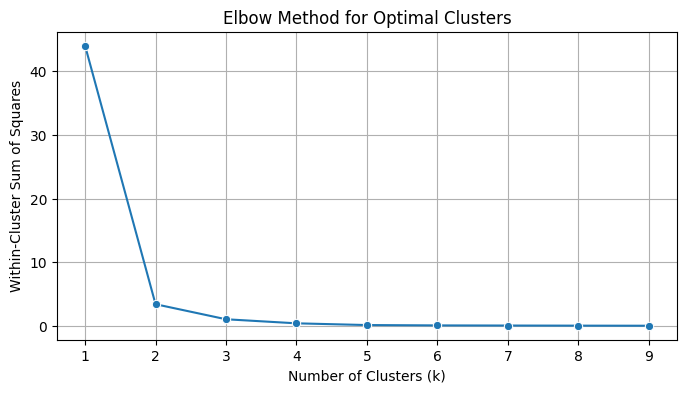

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

df['date'] = pd.to_datetime(df['date'])
donation_summary = df.groupby('hospital').agg(
    Total_Blood_Donations=('daily', 'sum'),
    Days_Reported=('date', 'nunique')
).reset_index()
donation_summary['Average_Daily_Donations'] = (
    donation_summary['Total_Blood_Donations'] / donation_summary['Days_Reported']
)

scaler = StandardScaler()
features = donation_summary[['Average_Daily_Donations', 'Total_Blood_Donations']]
scaled = scaler.fit_transform(features)

wss = []
K_range = range(1, 10)
for k in K_range:
    km = KMeans(n_clusters=k, n_init=25, random_state=123)
    km.fit(scaled)
    wss.append(km.inertia_)

plt.figure(figsize=(8, 4))
sns.lineplot(x=list(K_range), y=wss, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Within-Cluster Sum of Squares")
plt.grid(True)
plt.show()


In [4]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, n_init=25, random_state=123)
donation_summary['Cluster'] = kmeans.fit_predict(scaled).astype(str)


In [5]:
fig = px.scatter(
    donation_summary,
    x="Average_Daily_Donations",
    y="Total_Blood_Donations",
    color="Cluster",
    hover_data=["hospital"],
    title="Clustering of Hospitals Based on Donation Patterns",
    color_discrete_sequence=["blue", "green", "red"]
)
fig.update_layout(
    xaxis_title="Average Daily Donations",
    yaxis_title="Total Blood Donations"
)
fig.show()


In [ ]:
cluster_summary = donation_summary.groupby("Cluster").agg(
    Avg_Daily_Donations=("Average_Daily_Donations", "mean"),
    Total_Blood_Donations=("Total_Blood_Donations", "mean"),
    Count=("hospital", "count")
).reset_index()

print("Cluster Summary:")
print(cluster_summary)

  Cluster  Avg_Daily_Donations  Total_Blood_Donations  Count
0       0            22.121457           1.565314e+05     14
1       1           479.048756           3.389749e+06      1
2       2            70.230296           4.969496e+05      7


below states the hospitas that has low donation

In [ ]:
owest_cluster = cluster_summary.loc[
    cluster_summary["Avg_Daily_Donations"].idxmin(), "Cluster"
]

low_donation_hospitals = donation_summary[
    donation_summary["Cluster"] == lowest_cluster
].sort_values("Average_Daily_Donations")

print("\nHospitals in the lowest-donation cluster:")
print(low_donation_hospitals[["hospital", "Average_Daily_Donations", "Total_Blood_Donations"]])

                             hospital  Average_Daily_Donations  \
0            Hospital Duchess Of Kent                 6.233183   
16                     Hospital Tawau                 8.746750   
9                       Hospital Sibu                11.781656   
8               Hospital Seri Manjung                12.273177   
2                       Hospital Miri                13.124505   
10    Hospital Sultan Haji Ahmad Shah                14.596241   
15                   Hospital Taiping                16.451244   
17       Hospital Tengku Ampuan Afzan                19.311334   
7              Hospital Seberang Jaya                22.750000   
13      Hospital Sultanah Nora Ismail                24.934002   
5   Hospital Raja Perempuan Zainab II                32.615602   
3               Hospital Pulau Pinang                40.823488   
19             Hospital Tuanku Jaafar                41.239259   
14      Hospital Sultanah Nur Zahirah                44.819955   

    Total

In [11]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

labels = donation_summary['Cluster'].astype(int)
metrics = {
    "Silhouette Score": silhouette_score(scaled, labels),
    "Calinski-Harabasz": calinski_harabasz_score(scaled, labels),
    "Davies-Bouldin": davies_bouldin_score(scaled, labels)
}

for k, v in metrics.items():
    print(f"{k}: {v:.4f}")


Silhouette Score: 0.5716
Calinski-Harabasz: 390.8818
Davies-Bouldin: 0.3482


## **5. Result Evaluation + Interpretation**

### **5.1 Regression with SARIMAX** 

In [ ]:
print("--- OVERALL IN-SAMPLE MODEL EVALUATION METRICS (ALL STATES) ---")
print("="*50)

if len(all_y_true_overall) > 0:
    overall_mae = mean_absolute_error(all_y_true_overall, all_y_pred_overall)
    overall_mse = mean_squared_error(all_y_true_overall, all_y_pred_overall)
    overall_rmse = np.sqrt(overall_mse)

    if np.any(all_y_true_overall == 0):
        non_zero_overall_indices = all_y_true_overall != 0
        if np.sum(non_zero_overall_indices) > 0:
            overall_mape = np.mean(np.abs((all_y_true_overall[non_zero_overall_indices] - all_y_pred_overall[non_zero_overall_indices]) / all_y_true_overall[non_zero_overall_indices])) * 100
        else:
            overall_mape = np.nan
    else:
        overall_mape = np.mean(np.abs((all_y_true_overall - all_y_pred_overall) / all_y_true_overall)) * 100
    
    ss_total_overall = np.sum((all_y_true_overall - np.mean(all_y_true_overall)) ** 2)
    ss_residual_overall = np.sum((all_y_true_overall - all_y_pred_overall) ** 2)
    overall_r2 = 1 - (ss_residual_overall / ss_total_overall) if ss_total_overall > 0 else 0

    print(f"Overall Mean Absolute Error (MAE): {overall_mae:.2f}")
    print(f"Overall Mean Squared Error (MSE): {overall_mse:.2f}")
    print(f"Overall Root Mean Squared Error (RMSE): {overall_rmse:.2f}")
    print(f"Overall Mean Absolute Percentage Error (MAPE): {overall_mape:.2f}%")
    print(f"Overall R-squared (R2): {overall_r2:.2f}")
else:
    print("No data available to calculate overall evaluation metrics.")

--- OVERALL IN-SAMPLE MODEL EVALUATION METRICS (ALL STATES) ---
Overall Mean Absolute Error (MAE): 215.85
Overall Mean Squared Error (MSE): 131510.19
Overall Root Mean Squared Error (RMSE): 362.64
Overall Mean Absolute Percentage Error (MAPE): 41.43%
Overall R-squared (R2): 0.93


The model demonstrates strong in-sample performance, with an R² of 0.93 indicating that 93% of the variation in blood donations is explained by the model. The MAE of 215.85 and RMSE of 362.64 suggest moderate average errors, while the MAPE of 41.43% reflects relatively high percentage deviations in some predictions. Overall, the model fits the training data well but may require further refinement to improve precision and reduce relative error.

### **5.2 Clustering with KNN**

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

labels = donation_summary['Cluster'].astype(int)
metrics = {
    "Silhouette Score": silhouette_score(scaled, labels),
    "Calinski-Harabasz": calinski_harabasz_score(scaled, labels),
    "Davies-Bouldin": davies_bouldin_score(scaled, labels)
}

for k, v in metrics.items():
    print(f"{k}: {v:.4f}")


Silhouette Score: 0.5716
Calinski-Harabasz: 390.8818
Davies-Bouldin: 0.3482


The clustering results indicate a strong overall performance. A Silhouette Score of 0.5716 suggests that the clusters are well-separated with good internal cohesion. The Calinski-Harabasz Index of 390.88 further supports this, reflecting a high ratio of between-cluster dispersion relative to within-cluster variance. Additionally, the Davies-Bouldin Score of 0.3482—which is low—implies minimal overlap between clusters. Collectively, these metrics confirm that the K-Means model has effectively captured distinct patterns in hospital blood donation behavior.

## **6. Members' Contribution**

| Name              | Student Matric No | Contribution (%) |
|-------------------|-------------------|------------------|
| Lim Hon Ting      | S2114212          | 20%              |
| Sam Wei Hong      | U2102776          | 20%              |
| Lim Zheng Yu      | U2102809          | 20%              |
| Chan See Mun      | 24085842          | 20%              |
| Md Azrul Syaffiq  | 17127309          | 20%              |
